# <h1><center>A Tutorial on Data Science through Movies</center></h1>
> Collaborators: Archit Kambhamettu, Rohit Mukund, Saurabh Gadre, Vineeth Gohimukkula

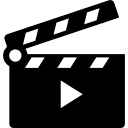

## Table of Contents:
* [Introduction](#intro)
* [1. Data Collection/Data Cleaning](#dataCollectAndClean)
 * [Imports for Data Collection](#importDC)
 * [Overview of Data Collection](#overviewData)
* [Data Cleaning and Processing](#cleanProcess)
 * [Using the TMDB API](#tmdbAPI)
* [2. Exploratory Data Analysis and Visualization](#dataViz)
 * [Initial Visuals](#initialViz)
* [3. Model: Analysis, Hypothesis Testing, & ML](#ml)
 * [Preliminary Exploration for Model Use](#preliminary)
 * [Feature Importance](#feature)
 * [K Nearest Neighbors](#knn)
 * [Random Forest Classifier](#rfc)
 * [Logistic Regression Classifier](#logistic)
 * [Movie Recommender](#movieRec)
 * [Movie Recommender II](#movieRec2)
* [4. Interpretation: Insight & Policy Decision](#conclusion)

## Introduction <a class="anchor" id="intro"></a>

In an age where entertainment options are more abundant than ever, choosing the perfect movie to watch can be an impossible task. We've all been there: scrolling endlessly through Netflix and Hulu just to settle on a mediocre movie because you're just too overwhelmed by the options. In the 80s, there were only about a hundred movies released per year. Now, there's over 800 movies made per year in the US [alone](https://www.statista.com/statistics/187122/movie-releases-in-north-america-since-2001/)! Luckily, we've used our knowledge about data science and machine learning to help you make the perfect choice. 

The purpose of this project is not just to create a movie recommender, it is mainly to walk you through the [data science lifecycle](https://www.knowledgehut.com/blog/data-science/what-is-data-science-life-cycle). There are 5 main steps that data scientists follow. The first is data collection, which consists of looking for data that could be interesting to analyze based on a central inquiry. Next comes cleaning and processing the data so that it is in a usable form for analysis. The processed data is then visualized for better understanding of trends and spread. Once the data is analyzed and visualized, it is modelled through ML. Finally, the analyzed data and the results of the model drive new in sights on the central question and policy decisions can be made with greater certainty. 

We hope you enjoy this journey into the world of data science and find our results intriguing! 

## Data Collection/Data Cleaning <a class="anchor" id="dataCollectAndClean"></a>


#### Imports for Data Collection  <a class="anchor" id="importDC"></a>
For this project, we imported many libraries that are instrumental in data science. These include [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), and [Beautiful Soup](https://beautiful-soup-4.readthedocs.io/en/latest/#:~:text=Beautiful%20Soup%20is%20a%20Python,hours%20or%20days%20of%20work.), which makes it easy to pull data out of HTML files.

In [54]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import html5lib

### Overview of Data Collection  <a class="anchor" id="overviewData"></a>

Data collection is the first step in the data science life cycle. To gather the data needed for this project, we scoured the web to look for sources that would give us the most amount of data in a simple format. To start, we looked at the [IMDB Top 250](https://www.imdb.com/chart/top/) movies list which gave us the title of the movie and the imdb rating in a tabular format. However, we recognized that we would need more information if we were to do real data analysis on an abundance of factors. Also, we felt that 250 entries in a table would simply not be enough data points to train a model. 



#### Webscraping from Wikipedia <a class="anchor" id="wikiScrape"></a>
So, we needed a comprehensive list of movies from the past decade sorted by year. We decided to do this by webscraping from Wikipedia, since this list is arranged by month and year, as well as giving us additional information on Production Company. This list is messy when scraped, but  proper data cleaning in combination with extraneous data from the two API's will generate a list of clean data that supports thorough analysis.

We start by using the requests library to make a GET request to [Wikipedia's webpage for American movies by year](https://en.wikipedia.org/wiki/Lists_of_American_films). Each year's Wikipedia page is split into 5 different tables:
1) The top 10 movies of the year
2) Movies released in January through March
3) Movies released in April through June
4) Movies released in July through September
5) Movies released in October through December

We want to pull all of the table tags out of the HTML using BeautifulSoup. Since all we are seeking is a list of movies in the year, we can ignore the first table. Once we have these tables, we can concetenate them together, making a table for each year, and then do one final concentation to get our complete data set 

In [55]:
dfs = []
# We can start by collecting one dataframe for each year, and then concatenating them together.
for i in range(2011, 2022):
    # First we pull this specific year's table of off wikipedia.
    # Wikipedia splits its tables between the following 
    # 1) A top hits table
    # 2 -> 5) January-March, April-June, July-September, October-December
    
    # We can use beautiful soup to grab each of these tables, and concatenate all of these together 
    r = requests.get(f'https://en.wikipedia.org/wiki/List_of_American_films_of_{str(i)}')
    soup = BeautifulSoup(r.text, 'html.parser')
    find_table = soup.find_all('table')
    tables = pd.read_html(str(find_table))
    df = pd.concat([tables[2], tables[3], tables[4], tables[5]])
    # Now, set the year to be this index
    df['year'] = i
    dfs.append(df)

In [56]:
# We then concatenate all of these years together into one larger dataframe
data = pd.concat(dfs)
data

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,year,Production Company
0,JANUARY,5.0,"If I Want to Whistle, I Whistle",Film Movement,Florin Șerban (director); George Piştereanu,[2],NaN,2011,NaN
1,JANUARY,5.0,Phil Ochs: There but for Fortune,First Run Features,Kenneth Bowser (director),[3],NaN,2011,NaN
2,JANUARY,7.0,Season of the Witch,Rogue Pictures / Relativity Media,Dominic Sena (director); Bragi Schut (screenpl...,[4],NaN,2011,NaN
3,JANUARY,7.0,The Time That Remains,IFC Films,"Elia Suleiman (director); Elia Suleiman, Saleh...",[5],NaN,2011,NaN
4,JANUARY,14.0,Barney's Version,Sony Pictures Classics,Richard J. Lewis (director); Michael Konyves (...,NaN,NaN,2011,NaN
...,...,...,...,...,...,...,...,...,...
93,DECEMBER,25.0,The Tragedy of Macbeth,Apple TV+ / A24 / IAC Films,Joel Coen (director/screenplay); Denzel Washin...,NaN,[273],2021,NaN
94,DECEMBER,25.0,A Journal for Jordan,Columbia Pictures / Escape Artists / Bron Studios,Denzel Washington (director); Virgil Williams ...,NaN,[274],2021,NaN
95,DECEMBER,25.0,American Underdog,Lionsgate,"Erwin brothers (directors); Jon Erwin, David A...",NaN,[275],2021,NaN
96,DECEMBER,26.0,Memoria,Neon,Apichatpong Weerasethakul (director/acreenplay...,NaN,[276],2021,NaN


#### Pulling from the OMDB API  <a class="anchor" id="omdbAPI"></a>
Because we want information on Movies such as Director, Genre, Plot Summary, Rating, and Box Office Score along with IMDB Rating that the Wikipedia page does not contain, we need to find a way to find this information. Luckily, the [Internet Movie Database (IMDB)](https://www.imdb.com/) has copious amounts of information regarding movies, and we can access this information by accessing the Online Movie Database(OMDB).

By requesting a key from [OMDB](https://www.omdbapi.com/), we can use this key to access details from the Application Programming Interface, or API, which will allow us to gather much more information regarding the movies.

We start by developing a function, search_movie, that takes in a movie title and generates a JSON (JavaScript Object Notation) object from the API. This JSON will gives us valuable information on any movie.

In [57]:
def search_movie(search_string):
  # We start a request session in order to create a GET Request from this API
  sess = requests.Session()
  # Putting in the API Key, requested from OMDB
  api_key = '9418ad5d'
  # Building the url
  base_url = f'http://www.omdbapi.com/?apikey={api_key}&'
  search_url = f'&t={search_string}'
  # Now, pulling the movie information from the API using the request session
  resp = sess.get(base_url + search_url)
  data = resp.json()
  return data

For example, lets search up one of the most popular movies, "The Avengers" and get its information. 

In [58]:
search_movie('The Avengers')

{'Title': 'The Avengers',
 'Year': '2012',
 'Rated': 'PG-13',
 'Released': '04 May 2012',
 'Runtime': '143 min',
 'Genre': 'Action, Sci-Fi',
 'Director': 'Joss Whedon',
 'Writer': 'Joss Whedon, Zak Penn',
 'Actors': 'Robert Downey Jr., Chris Evans, Scarlett Johansson',
 'Plot': "Earth's mightiest heroes must come together and learn to fight as a team if they are going to stop the mischievous Loki and his alien army from enslaving humanity.",
 'Language': 'English, Russian',
 'Country': 'United States',
 'Awards': 'Nominated for 1 Oscar. 38 wins & 80 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BNDYxNjQyMjAtNTdiOS00NGYwLWFmNTAtNThmYjU5ZGI2YTI1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '91%'},
  {'Source': 'Metacritic', 'Value': '69/100'}],
 'Metascore': '69',
 'imdbRating': '8.0',
 'imdbVotes': '1,411,647',
 'imdbID': 'tt0848228',
 'Type': 'movie',


#### Creating our Appended DataFrame
Now, we want to create a new DataFrame with this added information. We define a function, append_frame, which takes in a dictionary of sought after columns and fills this dictionary with information from the API, creating a DataFrame out of this information.

The Categories that we want to analyze are as follows:
1) Genre 
2) Actors 
3) Director
4) Plot 
5) Country 
6) Language
7) IMDBRating
8) BoxOffice
9) IMDBVotes
10) Metascore
11) Rated (PG, R, PG-13, etc.)

We then make calls to the API for these particular categories, and for each Title in the current database, we add this new information about the title to a column if it exists in the API.

In [59]:
# We start with our list of desired columns columns
lst = {"Genre": [], "Actors":[], "Director":[], "Plot":[], "Country":[], "Language":[], "imdbRating":[], "BoxOffice":[],\
       "imdbVotes":[], "Metascore":[], "Rated": []}
def append_frame(lst, df):
    # Now for each title in the DataFrame, we want to make an API Request for every category listed.
    for title in df['Title']:
        d = search_movie(title)
        # Now, d is our JSON Object. We want to check if there was a response in the API for this movie.
        # If there was, we can on to append the features. 
        if d['Response'] == 'True':
            # Now for every feature, append the output from the JSON object if it exists. Otherwise, append NaN.
            for feature in lst.keys():
                if feature in d.keys(): 
                    lst[feature].append(d[feature])
                else:
                    lst[feature].append(np.nan)
        else:
            # In this case, the title was not found in the dataframe, in which case we can simply set features to NaN
            for feature in lst.keys():
                lst[feature].append(np.nan)
                
    # make the dictionary into a DataFrame, and return it
    dataframe = pd.DataFrame(lst)
    return dataframe

# Now, we call this method on our data
api_response = append_frame(lst, data)

In [60]:
api_response

,Genre,Actors,Director,Plot,Country,Language,imdbRating,BoxOffice,imdbVotes,Metascore,Rated
0,Drama,"George Pistereanu, Ada Condeescu, Mihai Consta...",Florin Serban,"Two weeks before his release, a teenage prison...","Romania, Sweden, Germany",Romanian,7.0,"$12,135","6,424",64,Unrated
1,"Documentary, Biography, History","Salvador Allende, Erik Andersen, Joan Baez",Kenneth Bowser,From civil rights to the anti-war movement to ...,United States,English,7.8,"$263,723",405,72,Unrated
2,"Action, Adventure, Fantasy","Nicolas Cage, Ron Perlman, Claire Foy",Dominic Sena,14th-century knights transport a suspected wit...,United States,"English, Latin",5.4,"$24,827,228","95,932",28,PG-13
3,"Drama, History","Menashe Noy, Elia Suleiman, Baher Agbariya",Elia Suleiman,An examination of the creation of the state of...,"France, Belgium, Italy, United Kingdom, United...","Arabic, Hebrew, English",7.0,"$32,869","2,590",74,Not Rated
4,"Comedy, Drama","Paul Giamatti, Rosamund Pike, Jake Hoffman",Richard J. Lewis,The picaresque and touching story of the polit...,"Italy, Canada","English, French",7.3,"$4,439,201","25,586",67,R
...,...,...,...,...,...,...,...,...,...,...,...
2808,"Drama, Mystery, Thriller","Denzel Washington, Frances McDormand, Alex Has...",Joel Coen,A Scottish lord becomes convinced by a trio of...,United States,"English, Persian",7.1,N/A,"36,172",87,R
2809,Drama,"Michael B. Jordan, Chanté Adams, Jalon Christian",Denzel Washington,"1st Sgt. Charles Monroe King, before he is kil...",United States,English,5.9,"$6,545,174","2,367",42,PG-13
2810,"Biography, Drama, Sport","Zachary Levi, Anna Paquin, Hayden Zaller","Andrew Erwin, Jon Erwin",The story of NFL MVP and Hall of Fame quarterb...,United States,English,7.1,"$26,514,814","17,228",53,PG
2811,"Drama, Mystery, Sci-Fi","Tilda Swinton, Agnes Brekke, Daniel Giménez Cacho",Apichatpong Weerasethakul,"A woman from Scotland, while traveling in Colo...","Colombia, Thailand, France, Germany, Mexico, Q...","English, Spanish",6.5,"$52,656","9,572",91,PG


Now, we can combine the two previous dataframes by creating a title column for this DataFrame, which will match exactly with the title column for the previously scraped data from Wikipedia.

In [61]:
df = api_response
data = data.reset_index()
# setting the titles to match that of Wikipedia.
df['Title'] = data['Title']
df

,Genre,Actors,Director,Plot,Country,Language,imdbRating,BoxOffice,imdbVotes,Metascore,Rated,Title
0,Drama,"George Pistereanu, Ada Condeescu, Mihai Consta...",Florin Serban,"Two weeks before his release, a teenage prison...","Romania, Sweden, Germany",Romanian,7.0,"$12,135","6,424",64,Unrated,"If I Want to Whistle, I Whistle"
1,"Documentary, Biography, History","Salvador Allende, Erik Andersen, Joan Baez",Kenneth Bowser,From civil rights to the anti-war movement to ...,United States,English,7.8,"$263,723",405,72,Unrated,Phil Ochs: There but for Fortune
2,"Action, Adventure, Fantasy","Nicolas Cage, Ron Perlman, Claire Foy",Dominic Sena,14th-century knights transport a suspected wit...,United States,"English, Latin",5.4,"$24,827,228","95,932",28,PG-13,Season of the Witch
3,"Drama, History","Menashe Noy, Elia Suleiman, Baher Agbariya",Elia Suleiman,An examination of the creation of the state of...,"France, Belgium, Italy, United Kingdom, United...","Arabic, Hebrew, English",7.0,"$32,869","2,590",74,Not Rated,The Time That Remains
4,"Comedy, Drama","Paul Giamatti, Rosamund Pike, Jake Hoffman",Richard J. Lewis,The picaresque and touching story of the polit...,"Italy, Canada","English, French",7.3,"$4,439,201","25,586",67,R,Barney's Version
...,...,...,...,...,...,...,...,...,...,...,...,...
2808,"Drama, Mystery, Thriller","Denzel Washington, Frances McDormand, Alex Has...",Joel Coen,A Scottish lord becomes convinced by a trio of...,United States,"English, Persian",7.1,N/A,"36,172",87,R,The Tragedy of Macbeth
2809,Drama,"Michael B. Jordan, Chanté Adams, Jalon Christian",Denzel Washington,"1st Sgt. Charles Monroe King, before he is kil...",United States,English,5.9,"$6,545,174","2,367",42,PG-13,A Journal for Jordan
2810,"Biography, Drama, Sport","Zachary Levi, Anna Paquin, Hayden Zaller","Andrew Erwin, Jon Erwin",The story of NFL MVP and Hall of Fame quarterb...,United States,English,7.1,"$26,514,814","17,228",53,PG,American Underdog
2811,"Drama, Mystery, Sci-Fi","Tilda Swinton, Agnes Brekke, Daniel Giménez Cacho",Apichatpong Weerasethakul,"A woman from Scotland, while traveling in Colo...","Colombia, Thailand, France, Germany, Mexico, Q...","English, Spanish",6.5,"$52,656","9,572",91,PG,Memoria


### Data Cleaning: Organizing Relavent Information & Addressing Missing Data  <a class="anchor" id="cleanProcess"></a>


#### Organizing Relavent Information
Since some information from the original Wikipedia scraped database is valuable, we want to maintain the storage of that information in the new DataFrame, but since some of it is messy, it needs to be organized a bit. First, we keep the Production Company data, which can remain untouched. Then, we want to add the date. In general, for our analysis, we need to maintain the year seperate, so we will avoid creating a datetime object. Instead, we will clean up the months formatting, along with renaming some of the columns to be more relavent to their purpose. 

In [62]:
df['Production Company'] = data['Production company']
df['year'] = data['year']
# We want to remove whitespace from the Month,as well as making it lowercase.
df['month'] = data['Opening'].apply(lambda x: x.replace(" ", "").lower())
df['day'] = data['Opening.1']
# Reorganizing the dataframe so that Title is now the first column
df = df[['Title','Genre', 'Actors', 'Director', 'Plot', 'Country', 'Language',
       'imdbRating', 'BoxOffice', 'imdbVotes', 'Metascore', 'month', 'day', 'year','Production Company','Rated']]
df

,Title,Genre,Actors,Director,Plot,Country,Language,imdbRating,BoxOffice,imdbVotes,Metascore,month,day,year,Production Company,Rated
0,"If I Want to Whistle, I Whistle",Drama,"George Pistereanu, Ada Condeescu, Mihai Consta...",Florin Serban,"Two weeks before his release, a teenage prison...","Romania, Sweden, Germany",Romanian,7.0,"$12,135","6,424",64,january,5.0,2011,Film Movement,Unrated
1,Phil Ochs: There but for Fortune,"Documentary, Biography, History","Salvador Allende, Erik Andersen, Joan Baez",Kenneth Bowser,From civil rights to the anti-war movement to ...,United States,English,7.8,"$263,723",405,72,january,5.0,2011,First Run Features,Unrated
2,Season of the Witch,"Action, Adventure, Fantasy","Nicolas Cage, Ron Perlman, Claire Foy",Dominic Sena,14th-century knights transport a suspected wit...,United States,"English, Latin",5.4,"$24,827,228","95,932",28,january,7.0,2011,Rogue Pictures / Relativity Media,PG-13
3,The Time That Remains,"Drama, History","Menashe Noy, Elia Suleiman, Baher Agbariya",Elia Suleiman,An examination of the creation of the state of...,"France, Belgium, Italy, United Kingdom, United...","Arabic, Hebrew, English",7.0,"$32,869","2,590",74,january,7.0,2011,IFC Films,Not Rated
4,Barney's Version,"Comedy, Drama","Paul Giamatti, Rosamund Pike, Jake Hoffman",Richard J. Lewis,The picaresque and touching story of the polit...,"Italy, Canada","English, French",7.3,"$4,439,201","25,586",67,january,14.0,2011,Sony Pictures Classics,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,The Tragedy of Macbeth,"Drama, Mystery, Thriller","Denzel Washington, Frances McDormand, Alex Has...",Joel Coen,A Scottish lord becomes convinced by a trio of...,United States,"English, Persian",7.1,N/A,"36,172",87,december,25.0,2021,Apple TV+ / A24 / IAC Films,R
2809,A Journal for Jordan,Drama,"Michael B. Jordan, Chanté Adams, Jalon Christian",Denzel Washington,"1st Sgt. Charles Monroe King, before he is kil...",United States,English,5.9,"$6,545,174","2,367",42,december,25.0,2021,Columbia Pictures / Escape Artists / Bron Studios,PG-13
2810,American Underdog,"Biography, Drama, Sport","Zachary Levi, Anna Paquin, Hayden Zaller","Andrew Erwin, Jon Erwin",The story of NFL MVP and Hall of Fame quarterb...,United States,English,7.1,"$26,514,814","17,228",53,december,25.0,2021,Lionsgate,PG
2811,Memoria,"Drama, Mystery, Sci-Fi","Tilda Swinton, Agnes Brekke, Daniel Giménez Cacho",Apichatpong Weerasethakul,"A woman from Scotland, while traveling in Colo...","Colombia, Thailand, France, Germany, Mexico, Q...","English, Spanish",6.5,"$52,656","9,572",91,december,26.0,2021,Neon,PG


#### Missing Data
Now, we want to address missing data. We will do this as follows:
1) Any row that has a title missing will be dropped. These rows are pointless to anaylze, since there is no use when we do not know which movie is being discussed
2) Any row with both imdbRating and BoxOffice missing are also dropped. Since these are two key points of analysis, we need not account for any row in our dataframe that has both of these missing.

This will allow our dataset to be prepped for analysis, given that missing data can affect certain methods of analysis.

In [63]:
total = df
total["Title"].isnull().sum()
# Finding all of those with Titles missing, or both imdbRating and BoxOffice
total.dropna(subset=['imdbRating', 'BoxOffice']).sum(numeric_only = True)
total = total.dropna(subset=['Title'])
total = total.dropna(subset=['imdbRating', 'BoxOffice'], how='all')
total

,Title,Genre,Actors,Director,Plot,Country,Language,imdbRating,BoxOffice,imdbVotes,Metascore,month,day,year,Production Company,Rated
0,"If I Want to Whistle, I Whistle",Drama,"George Pistereanu, Ada Condeescu, Mihai Consta...",Florin Serban,"Two weeks before his release, a teenage prison...","Romania, Sweden, Germany",Romanian,7.0,"$12,135","6,424",64,january,5.0,2011,Film Movement,Unrated
1,Phil Ochs: There but for Fortune,"Documentary, Biography, History","Salvador Allende, Erik Andersen, Joan Baez",Kenneth Bowser,From civil rights to the anti-war movement to ...,United States,English,7.8,"$263,723",405,72,january,5.0,2011,First Run Features,Unrated
2,Season of the Witch,"Action, Adventure, Fantasy","Nicolas Cage, Ron Perlman, Claire Foy",Dominic Sena,14th-century knights transport a suspected wit...,United States,"English, Latin",5.4,"$24,827,228","95,932",28,january,7.0,2011,Rogue Pictures / Relativity Media,PG-13
3,The Time That Remains,"Drama, History","Menashe Noy, Elia Suleiman, Baher Agbariya",Elia Suleiman,An examination of the creation of the state of...,"France, Belgium, Italy, United Kingdom, United...","Arabic, Hebrew, English",7.0,"$32,869","2,590",74,january,7.0,2011,IFC Films,Not Rated
4,Barney's Version,"Comedy, Drama","Paul Giamatti, Rosamund Pike, Jake Hoffman",Richard J. Lewis,The picaresque and touching story of the polit...,"Italy, Canada","English, French",7.3,"$4,439,201","25,586",67,january,14.0,2011,Sony Pictures Classics,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,The King's Man,"Action, Adventure, Thriller","Ralph Fiennes, Gemma Arterton, Rhys Ifans",Matthew Vaughn,"In the early years of the 20th century, the Ki...","United Kingdom, United States","English, Latin, German, French, Russian",6.3,"$37,176,373","156,453",44,december,22.0,2021,20th Century Studios / Marv Studios / TSG Ente...,R
2808,The Tragedy of Macbeth,"Drama, Mystery, Thriller","Denzel Washington, Frances McDormand, Alex Has...",Joel Coen,A Scottish lord becomes convinced by a trio of...,United States,"English, Persian",7.1,N/A,"36,172",87,december,25.0,2021,Apple TV+ / A24 / IAC Films,R
2809,A Journal for Jordan,Drama,"Michael B. Jordan, Chanté Adams, Jalon Christian",Denzel Washington,"1st Sgt. Charles Monroe King, before he is kil...",United States,English,5.9,"$6,545,174","2,367",42,december,25.0,2021,Columbia Pictures / Escape Artists / Bron Studios,PG-13
2810,American Underdog,"Biography, Drama, Sport","Zachary Levi, Anna Paquin, Hayden Zaller","Andrew Erwin, Jon Erwin",The story of NFL MVP and Hall of Fame quarterb...,United States,English,7.1,"$26,514,814","17,228",53,december,25.0,2021,Lionsgate,PG


#### Using the TMDB API  <a class="anchor" id="tmdbAPI"></a>
Despite the copious amount of information that we gained from the OMDB API, we are missing two key pieces of information in analyzing movies: Budget and Keywords. With Budget, we can understand how much investment went into a movie. This is vital in seeing if a particular movie lived up to its expectation. Keywords or Tags help us generate some sort of inside into the details in the movie. While genre tells us what sort of movie it is, keywords provide specific information into the subgenre. For example, the Avengers, while classified as action, is specfically a Superhero movie in the Marvel Universe, and such words would be tagged as keywords. This will help us in deciding which movie to recommend to a person.

We can get this information from another databases' API, The Movie DataBase (TMDB). This API has plenty more information on movies, but we will focus on Budget and Keywords as mentioned before. To this point, we will develop functions get_budget and get_keywords that take in a movie's title and generate the Budget and Keywords from the API. Similar to the other API, we start a equest session, form the URL, and use an API Key given by TMDB in order to retrieve the information.

In [64]:
def get_budget(title):
    # starting the session in order to get info from the API
    title = title.replace(" ", "+")
    sess = requests.Session()
    # We then form our url with our title, api key and base url
    api_key = '58ea292f930b11d66214fcb7a1bae448'
    base_url = f'https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={title}'
    resp = sess.get(base_url)
    # retrieving data as a json, but since this json does not contain the neccesary information, we 
    # take the id from the json and use it in a different request(if results came, otherwise we simply 
    # append np.nan
    datas = resp.json()
    if(len(datas['results']) < 1):
        return np.nan
    # use the id as mentioned to get the budget from the JSON in a similar request.
    eyedee = datas['results'][0]['id']
    url = f'https://api.themoviedb.org/3/movie/{eyedee}?api_key=58ea292f930b11d66214fcb7a1bae448'
    r2 = sess.get(url)
    data2 = r2.json()
    return data2['budget']

To test, we'll find out what the budget was for "The Avengers"

In [65]:
get_budget("The Avengers")

220000000

Now, we wish to generate the keywords instead of the budget and test it on "The Avengers"

In [66]:
# Almost identical to Budget, but instead we wish to generate the keywords instead of the Budget. 
def get_keywords(title):
    title = title.replace(" ", "+")
    # starting the session in order to get info from the API
    sess = requests.Session()
    # We then form our url with our title, api key and base url

    api_key = '58ea292f930b11d66214fcb7a1bae448'
    base_url = f'https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={title}'
    resp = sess.get(base_url)
    
    # retrieving data as a json, but since this json does not contain the neccesary information, we 
    # take the id from the json and use it in a different request(if results came, otherwise we simply 
    # append np.nan
    datas = resp.json()
    if(len(datas['results']) < 1):
        return np.nan
    
    # use the id as mentioned to get the budget from the JSON in a similar request.
    eyedee = datas['results'][0]['id']
    url = f'https://api.themoviedb.org/3/movie/{eyedee}/keywords?api_key=58ea292f930b11d66214fcb7a1bae448'
    r2 = sess.get(url)
    data2 = r2.json()
    return data2['keywords']

get_keywords("The Avengers")

[{'id': 242, 'name': 'new york city'},
 {'id': 5539, 'name': 'shield'},
 {'id': 9715, 'name': 'superhero'},
 {'id': 9717, 'name': 'based on comic'},
 {'id': 14909, 'name': 'alien invasion'},
 {'id': 155030, 'name': 'superhero team'},
 {'id': 179430, 'name': 'aftercreditsstinger'},
 {'id': 179431, 'name': 'duringcreditsstinger'},
 {'id': 180547, 'name': 'marvel cinematic universe (mcu)'}]

We now apply this to dataframe's title column, generating the budgets and keywords into a Series.

In [67]:
info = total['Title'].apply(lambda x: (get_budget(x), get_keywords(x)))
info

0                                                 (0, [])
1                                                 (0, [])
2       (40000000, [{'id': 344, 'name': 'inquisition'}...
3           (6500000, [{'id': 537, 'name': 'palestine'}])
4       (30000000, [{'id': 236, 'name': 'suicide'}, {'...
                              ...                        
2807    (100000000, [{'id': 212, 'name': 'london, engl...
2808    (0, [{'id': 388, 'name': 'scotland'}, {'id': 1...
2809                                              (0, [])
2810    (0, [{'id': 579, 'name': 'american football'},...
2811    (0, [{'id': 155800, 'name': 'atmospheric'}, {'...
Name: Title, Length: 2759, dtype: object

Then, we can unpack this series into a dataframe, and then index the dataframe to create our new columns!

In [68]:
tmdb_response = info.apply(pd.Series)
total['Budget'] = tmdb_response[0]
total['Keywords'] = tmdb_response[1]
total

,Title,Genre,Actors,Director,Plot,Country,Language,imdbRating,BoxOffice,imdbVotes,Metascore,month,day,year,Production Company,Rated,Budget,Keywords
0,"If I Want to Whistle, I Whistle",Drama,"George Pistereanu, Ada Condeescu, Mihai Consta...",Florin Serban,"Two weeks before his release, a teenage prison...","Romania, Sweden, Germany",Romanian,7.0,"$12,135","6,424",64,january,5.0,2011,Film Movement,Unrated,0.0,[]
1,Phil Ochs: There but for Fortune,"Documentary, Biography, History","Salvador Allende, Erik Andersen, Joan Baez",Kenneth Bowser,From civil rights to the anti-war movement to ...,United States,English,7.8,"$263,723",405,72,january,5.0,2011,First Run Features,Unrated,0.0,[]
2,Season of the Witch,"Action, Adventure, Fantasy","Nicolas Cage, Ron Perlman, Claire Foy",Dominic Sena,14th-century knights transport a suspected wit...,United States,"English, Latin",5.4,"$24,827,228","95,932",28,january,7.0,2011,Rogue Pictures / Relativity Media,PG-13,40000000.0,"[{'id': 344, 'name': 'inquisition'}, {'id': 34..."
3,The Time That Remains,"Drama, History","Menashe Noy, Elia Suleiman, Baher Agbariya",Elia Suleiman,An examination of the creation of the state of...,"France, Belgium, Italy, United Kingdom, United...","Arabic, Hebrew, English",7.0,"$32,869","2,590",74,january,7.0,2011,IFC Films,Not Rated,6500000.0,"[{'id': 537, 'name': 'palestine'}]"
4,Barney's Version,"Comedy, Drama","Paul Giamatti, Rosamund Pike, Jake Hoffman",Richard J. Lewis,The picaresque and touching story of the polit...,"Italy, Canada","English, French",7.3,"$4,439,201","25,586",67,january,14.0,2011,Sony Pictures Classics,R,30000000.0,"[{'id': 236, 'name': 'suicide'}, {'id': 931, '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,The King's Man,"Action, Adventure, Thriller","Ralph Fiennes, Gemma Arterton, Rhys Ifans",Matthew Vaughn,"In the early years of the 20th century, the Ki...","United Kingdom, United States","English, Latin, German, French, Russian",6.3,"$37,176,373","156,453",44,december,22.0,2021,20th Century Studios / Marv Studios / TSG Ente...,R,100000000.0,"[{'id': 212, 'name': 'london, england'}, {'id'..."
2808,The Tragedy of Macbeth,"Drama, Mystery, Thriller","Denzel Washington, Frances McDormand, Alex Has...",Joel Coen,A Scottish lord becomes convinced by a trio of...,United States,"English, Persian",7.1,N/A,"36,172",87,december,25.0,2021,Apple TV+ / A24 / IAC Films,R,0.0,"[{'id': 388, 'name': 'scotland'}, {'id': 1157,..."
2809,A Journal for Jordan,Drama,"Michael B. Jordan, Chanté Adams, Jalon Christian",Denzel Washington,"1st Sgt. Charles Monroe King, before he is kil...",United States,English,5.9,"$6,545,174","2,367",42,december,25.0,2021,Columbia Pictures / Escape Artists / Bron Studios,PG-13,0.0,[]
2810,American Underdog,"Biography, Drama, Sport","Zachary Levi, Anna Paquin, Hayden Zaller","Andrew Erwin, Jon Erwin",The story of NFL MVP and Hall of Fame quarterb...,United States,English,7.1,"$26,514,814","17,228",53,december,25.0,2021,Lionsgate,PG,0.0,"[{'id': 579, 'name': 'american football'}, {'i..."


We notice that keywords is formatted awkwardly, so to clean this up a bit, we can unpack the dictionary
that is returned so that we have a list of the key words.

In [69]:
total['Keywords'] = total['Keywords'].apply(lambda x: np.nan if type(x) is float else [d['name'] for d in x])
total

,Title,Genre,Actors,Director,Plot,Country,Language,imdbRating,BoxOffice,imdbVotes,Metascore,month,day,year,Production Company,Rated,Budget,Keywords
0,"If I Want to Whistle, I Whistle",Drama,"George Pistereanu, Ada Condeescu, Mihai Consta...",Florin Serban,"Two weeks before his release, a teenage prison...","Romania, Sweden, Germany",Romanian,7.0,"$12,135","6,424",64,january,5.0,2011,Film Movement,Unrated,0.0,[]
1,Phil Ochs: There but for Fortune,"Documentary, Biography, History","Salvador Allende, Erik Andersen, Joan Baez",Kenneth Bowser,From civil rights to the anti-war movement to ...,United States,English,7.8,"$263,723",405,72,january,5.0,2011,First Run Features,Unrated,0.0,[]
2,Season of the Witch,"Action, Adventure, Fantasy","Nicolas Cage, Ron Perlman, Claire Foy",Dominic Sena,14th-century knights transport a suspected wit...,United States,"English, Latin",5.4,"$24,827,228","95,932",28,january,7.0,2011,Rogue Pictures / Relativity Media,PG-13,40000000.0,"[inquisition, monk, ambush, witch, hero, fight..."
3,The Time That Remains,"Drama, History","Menashe Noy, Elia Suleiman, Baher Agbariya",Elia Suleiman,An examination of the creation of the state of...,"France, Belgium, Italy, United Kingdom, United...","Arabic, Hebrew, English",7.0,"$32,869","2,590",74,january,7.0,2011,IFC Films,Not Rated,6500000.0,[palestine]
4,Barney's Version,"Comedy, Drama","Paul Giamatti, Rosamund Pike, Jake Hoffman",Richard J. Lewis,The picaresque and touching story of the polit...,"Italy, Canada","English, French",7.3,"$4,439,201","25,586",67,january,14.0,2011,Sony Pictures Classics,R,30000000.0,"[suicide, jealousy, canada, politically incorr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,The King's Man,"Action, Adventure, Thriller","Ralph Fiennes, Gemma Arterton, Rhys Ifans",Matthew Vaughn,"In the early years of the 20th century, the Ki...","United Kingdom, United States","English, Latin, German, French, Russian",6.3,"$37,176,373","156,453",44,december,22.0,2021,20th Century Studios / Marv Studios / TSG Ente...,R,100000000.0,"[london, england, spy, world war i, based on c..."
2808,The Tragedy of Macbeth,"Drama, Mystery, Thriller","Denzel Washington, Frances McDormand, Alex Has...",Joel Coen,A Scottish lord becomes convinced by a trio of...,United States,"English, Persian",7.1,N/A,"36,172",87,december,25.0,2021,Apple TV+ / A24 / IAC Films,R,0.0,"[scotland, husband wife relationship, ambition..."
2809,A Journal for Jordan,Drama,"Michael B. Jordan, Chanté Adams, Jalon Christian",Denzel Washington,"1st Sgt. Charles Monroe King, before he is kil...",United States,English,5.9,"$6,545,174","2,367",42,december,25.0,2021,Columbia Pictures / Escape Artists / Bron Studios,PG-13,0.0,[]
2810,American Underdog,"Biography, Drama, Sport","Zachary Levi, Anna Paquin, Hayden Zaller","Andrew Erwin, Jon Erwin",The story of NFL MVP and Hall of Fame quarterb...,United States,English,7.1,"$26,514,814","17,228",53,december,25.0,2021,Lionsgate,PG,0.0,"[american football, biography, los angeles, ca..."


### Exploratory Data Analysis and Visualization  <a class="anchor" id="dataViz"></a>
We are now at the stage where we have processed our data into a usable form. Of course, there will be more processing throughout the rest of this project because we need to tailor the information based on the specific needs of the visualization or the model. In the first part of this analysis and visualization we will take a look at a bunch of different factors and explore the data in our table. 

For the data we use in the project, we made a .csv file to store the data because the api calls are constantly changing due to the number of people that interact with IMDB, changing the numbers. As you can see, the tables are identical.

In [1025]:
#create a copy of the api data so that we don't have to keep running it
apiData = total.copy()
apiData.head(10)

,Title,Genre,Actors,Director,Plot,Country,Language,imdbRating,BoxOffice,imdbVotes,Metascore,month,day,year,Production Company,Rated,Budget,Keywords
0,"If I Want to Whistle, I Whistle",Drama,"George Pistereanu, Ada Condeescu, Mihai Consta...",Florin Serban,"Two weeks before his release, a teenage prison...","Romania, Sweden, Germany",Romanian,7.0,"$12,135","6,424",64,january,5.0,2011,Film Movement,Unrated,0.0,[]
1,Phil Ochs: There but for Fortune,"Documentary, Biography, History","Salvador Allende, Erik Andersen, Joan Baez",Kenneth Bowser,From civil rights to the anti-war movement to ...,United States,English,7.8,"$263,723",405,72,january,5.0,2011,First Run Features,Unrated,0.0,[]
2,Season of the Witch,"Action, Adventure, Fantasy","Nicolas Cage, Ron Perlman, Claire Foy",Dominic Sena,14th-century knights transport a suspected wit...,United States,"English, Latin",5.4,"$24,827,228","95,932",28,january,7.0,2011,Rogue Pictures / Relativity Media,PG-13,40000000.0,"[inquisition, monk, ambush, witch, hero, fight..."
3,The Time That Remains,"Drama, History","Menashe Noy, Elia Suleiman, Baher Agbariya",Elia Suleiman,An examination of the creation of the state of...,"France, Belgium, Italy, United Kingdom, United...","Arabic, Hebrew, English",7.0,"$32,869","2,590",74,january,7.0,2011,IFC Films,Not Rated,6500000.0,[palestine]
4,Barney's Version,"Comedy, Drama","Paul Giamatti, Rosamund Pike, Jake Hoffman",Richard J. Lewis,The picaresque and touching story of the polit...,"Italy, Canada","English, French",7.3,"$4,439,201","25,586",67,january,14.0,2011,Sony Pictures Classics,R,30000000.0,"[suicide, jealousy, canada, politically incorr..."
5,The Dilemma,"Comedy, Drama","Vince Vaughn, Kevin James, Winona Ryder",Ron Howard,A man discovers that his best friend's wife is...,United States,English,5.3,"$48,475,290","55,332",46,january,14.0,2011,Universal Pictures / Imagine Entertainment / S...,PG-13,70000000.0,"[adultery, infidelity, bachelor, wife, investi..."
6,The Green Hornet,"Action, Comedy, Crime","Seth Rogen, Jay Chou, Christoph Waltz",Michel Gondry,"Following the death of his father, Britt Reid,...",United States,"English, Mandarin",5.8,"$98,780,042","162,350",39,january,14.0,2011,Columbia Pictures / Original Film,PG-13,120000000.0,"[bomb, martial arts, assassin, vandalism, nigh..."
7,No Strings Attached,"Comedy, Romance","Natalie Portman, Ashton Kutcher, Kevin Kline",Ivan Reitman,A guy and girl try to keep their relationship ...,"United States, United Kingdom","English, Ukrainian",6.2,"$70,662,220","236,097",50,january,21.0,2011,Paramount Pictures / The Montecito Picture Com...,R,25000000.0,"[parent child relationship, casual meeting, st..."
8,Open Season 3,"Animation, Adventure, Comedy","Matthew J. Munn, Nika Futterman, Maddie Taylor",Cody Cameron,Boog's friends rally to bring him home from a ...,"United States, Canada",English,5.0,N/A,"12,362",N/A,january,25.0,2011,Sony Pictures Home Entertainment / Sony Pictur...,PG,0.0,"[circus, friendship, deer, bear, look-alike, f..."
9,The Mechanic,"Action, Crime, Thriller","Jason Statham, Ben Foster, Donald Sutherland",Simon West,An elite hitman teaches his trade to an appren...,United States,English,6.5,"$29,121,498","164,471",49,january,28.0,2011,CBS Films,R,40000000.0,"[poison, chicago, illinois, prostitute, martia..."


In [1028]:
# read in the csv file of the data
data = pd.read_csv("fixedData.csv")

#create a copy for later use
data2 = data.copy()
data.head(10)

,Unnamed: 0,index,Title,Genre,Actors,Director,Plot,Country,Language,imdbRating,BoxOffice,imdbVotes,Metascore,month,day,year,Production Company,Rated,Budget,Keywords
0,0,0,"If I Want to Whistle, I Whistle",Drama,"George Pistereanu, Ada Condeescu, Mihai Consta...",Florin Serban,"Two weeks before his release, a teenage prison...","Romania, Sweden, Germany",Romanian,7.0,"$12,135","6,424",64.0,january,5.0,2011,Film Movement,Unrated,0.0,[]
1,1,1,Phil Ochs: There but for Fortune,"Documentary, Biography, History","Salvador Allende, Erik Andersen, Joan Baez",Kenneth Bowser,From civil rights to the anti-war movement to ...,United States,English,7.8,"$263,723",405,72.0,january,5.0,2011,First Run Features,Unrated,0.0,[]
2,2,2,Season of the Witch,"Action, Adventure, Fantasy","Nicolas Cage, Ron Perlman, Claire Foy",Dominic Sena,14th-century knights transport a suspected wit...,United States,"English, Latin",5.4,"$24,827,228","95,708",28.0,january,7.0,2011,Rogue Pictures / Relativity Media,PG-13,40000000.0,"['inquisition', 'monk', 'ambush', 'witch', 'he..."
3,3,3,The Time That Remains,"Drama, History","Menashe Noy, Elia Suleiman, Baher Agbariya",Elia Suleiman,An examination of the creation of the state of...,"France, Belgium, Italy, United Kingdom, United...","Arabic, Hebrew, English",7.0,"$32,869","2,590",74.0,january,7.0,2011,IFC Films,Not Rated,6500000.0,['palestine']
4,4,4,Barney's Version,"Comedy, Drama","Paul Giamatti, Rosamund Pike, Jake Hoffman",Richard J. Lewis,The picaresque and touching story of the polit...,"Italy, Canada","English, French",7.3,"$4,439,201","25,586",67.0,january,14.0,2011,Sony Pictures Classics,R,30000000.0,"['suicide', 'jealousy', 'canada', 'politically..."
5,5,5,The Dilemma,"Comedy, Drama","Vince Vaughn, Kevin James, Winona Ryder",Ron Howard,A man discovers that his best friend's wife is...,United States,English,5.3,"$48,475,290","55,332",46.0,january,14.0,2011,Universal Pictures / Imagine Entertainment / S...,PG-13,70000000.0,"['adultery', 'infidelity', 'bachelor', 'wife',..."
6,6,6,The Green Hornet,"Action, Comedy, Crime","Seth Rogen, Jay Chou, Christoph Waltz",Michel Gondry,"Following the death of his father, Britt Reid,...",United States,"English, Mandarin",5.8,"$98,780,042","162,350",39.0,january,14.0,2011,Columbia Pictures / Original Film,PG-13,120000000.0,"['bomb', 'martial arts', 'assassin', 'vandalis..."
7,7,7,No Strings Attached,"Comedy, Romance","Natalie Portman, Ashton Kutcher, Kevin Kline",Ivan Reitman,A guy and girl try to keep their relationship ...,"United States, United Kingdom","English, Ukrainian",6.2,"$70,662,220","236,097",50.0,january,21.0,2011,Paramount Pictures / The Montecito Picture Com...,R,25000000.0,"['parent child relationship', 'casual meeting'..."
8,8,8,Open Season 3,"Animation, Adventure, Comedy","Matthew J. Munn, Nika Futterman, Maddie Taylor",Cody Cameron,Boog's friends rally to bring him home from a ...,"United States, Canada",English,5.0,NaN,"12,362",NaN,january,25.0,2011,Sony Pictures Home Entertainment / Sony Pictur...,PG,0.0,"['circus', 'friendship', 'deer', 'bear', 'look..."
9,9,9,The Mechanic,"Action, Crime, Thriller","Jason Statham, Ben Foster, Donald Sutherland",Simon West,An elite hitman teaches his trade to an appren...,United States,English,6.5,"$29,121,498","164,471",49.0,january,28.0,2011,CBS Films,R,40000000.0,"['poison', 'chicago, illinois', 'prostitute', ..."


<b>Processing Box Office and Month Columns</b>
 
 In this raw data from the API, the BoxOffice and imdbVotes columns are represented as strings. Additionally, the BoxOffice columns are prepended with a $ sign and have commas indicating thousands of dollars. We remove these symbols and convert both these columns into floats, as we will be applying mathematical functions to them later. Additionally, the months are listed in word format (ie January, Feburary, ..) rather than in numerical format (ie 1,2,3...). We convert these strings to numbers using the [datetime import](https://docs.python.org/3/library/datetime.htmldatetime), mapping January &rarr; 1, Feburary &rarr; 2, and so on. 

 <b>Creating Hit Column</b>
 
 In addition to the dataframe columns we have, we add a new column called "hit." This column denotes movies as a hit (with a 1 in the column) if the imdbRating for that movie is > 6.5 or a non-hit (with a 0 in the column) if the imdbRating for that movie is < 6.5. We decided on using 6.5 as our hit differentiator, as that is the average imdbRating for all the movies in the dataframe. This coulmn will be used later on for our classification model!

In [1029]:
from datetime import datetime
#drop NA columns
data = data.dropna(subset = ["Rated"])
data = data[data["BoxOffice"].apply(lambda x: type(x) == str)]
data = data[data["Budget"] != 0.0] 

#change the formatting of the Box office and imdb votes columns to remove the comma and dollar sign 
data = data.sort_values("imdbRating", ascending = False)
data["BoxOffice"] = data["BoxOffice"].apply(lambda x: x.split("$")[1])
data["BoxOffice"] = data["BoxOffice"].apply(lambda x: x.replace(",",""))
data["imdbVotes"] = data["imdbVotes"].apply(lambda x: x.replace(",",""))

data = data.astype({"BoxOffice":'float', "imdbVotes":'float', "imdbRating":'float' })
data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%B').month)

data["hit"] = data.apply(lambda row : 1 if row["imdbRating"] > 6.5 and row["imdbVotes"] >500  else 0, axis = 1)

#### Initial Visualizations  <a class="anchor" id="initialViz"></a>
First, it would be interesting to see the box office of movies at different months throughout the year. It is generally known that the summer months and the november-december are considered the [best time](https://runpee.com/wide-release-movie-count-by-month/#:~:text=You%20can%20see%20that%20April,movies%20released%20during%20those%20months.) to release movies as the audience is the largest during this time. 

In [1030]:
#select the month and box office columns
month = data[['month', 'BoxOffice']]
month

,month,BoxOffice
944,11,188020017.0
928,10,13092000.0
2005,7,422783777.0
1867,12,190241310.0
730,11,707481.0
...,...,...
178,11,74158157.0
1776,8,30569484.0
921,10,14019924.0
2118,12,27166770.0


Text(0, 0.5, 'Box Office')

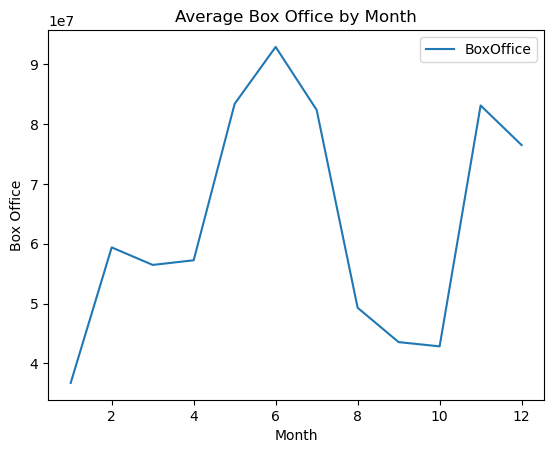

In [1031]:
#groupby the month to get unique months and plot the box office for each month
m = month.groupby(['month']).mean().plot()
m.set_title('Average Box Office by Month')
m.set_xlabel('Month')
m.set_ylabel('Box Office')

As we can see, we got the expected results. The summer months and the end of the year are the best months for box office. We now have one component that contributes to the success of a movie. Now, lets take a look at the year and how it relates to box office success.

Text(0, 0.5, 'Box Office')

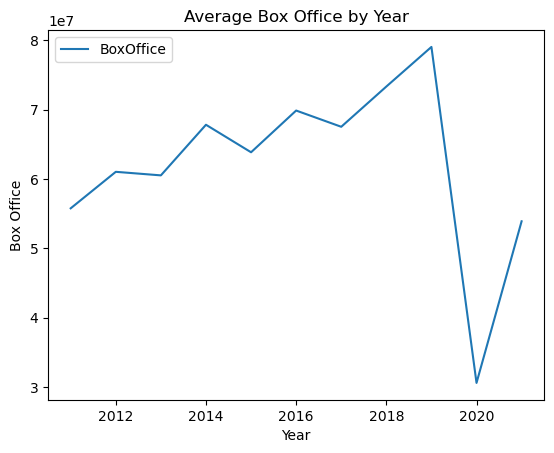

In [1032]:
#group by year to find out if there is a correlation between year and box office
yearData = data[['year', 'BoxOffice']]
y = yearData.groupby(['year']).mean().plot()
y.set_title('Average Box Office by Year')
y.set_xlabel('Year')
y.set_ylabel('Box Office')

This graph is not too surprising, but there is clearly an effect of the pandemic on movies where box office earnings have plummeted. Other than this, box office earnings have gone up every year. Now, lets look at the total profit and how it changes based on month.  

Text(0, 0.5, 'Profit')

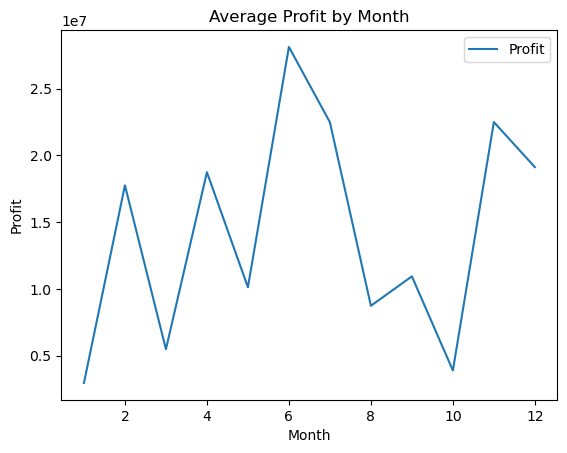

In [1033]:
#plots the profit per month
data['Profit'] = data['BoxOffice'] - data['Budget'] 
monthlyProfit = data[['month', 'Profit']]
monthlyProfit = monthlyProfit.groupby(['month']).mean().plot()
monthlyProfit.set_title('Average Profit by Month')
monthlyProfit.set_xlabel('Month')
monthlyProfit.set_ylabel('Profit')

It seems like the profit is dependent on month as well, as this graph's peaks are similar to the box office graph. A month feature would be interesting to look at to calculate whether a movie will be a hit. Another thing to analyze could be the relation between the box office and the aggregate number of imdb votes on the movie. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

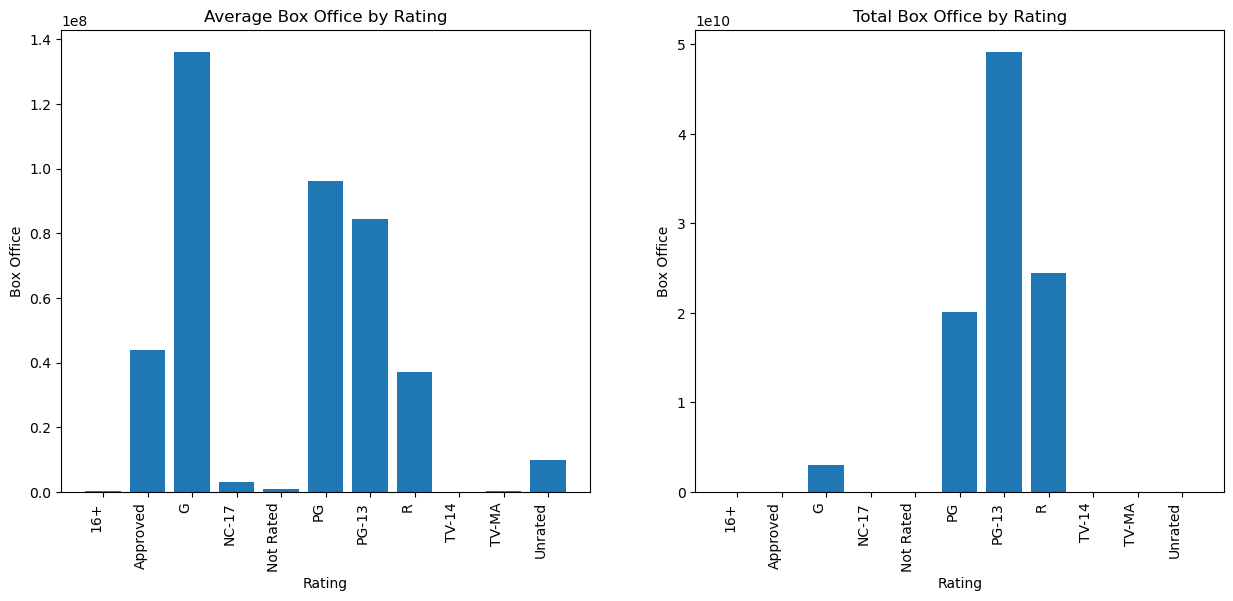

In [1034]:
plt.figure(figsize=(15, 6))

#create subplots
plt.subplot(1, 2, 1)
rateData = data[['Rated', 'BoxOffice']]
y = rateData.groupby(['Rated']).mean()

#barplots using average and sum of box office
plt.bar(y.index, y['BoxOffice'])
plt.title('Average Box Office by Rating')
plt.xlabel('Rating')
plt.ylabel('Box Office')
plt.xticks(rotation = 90, ha = 'right')

plt.subplot(1, 2, 2)
z = rateData.groupby(['Rated']).sum()

plt.bar(z.index, z['BoxOffice'])
plt.title('Total Box Office by Rating')
plt.xlabel('Rating')
plt.ylabel('Box Office')
plt.xticks(rotation = 90, ha = 'right')

Here is a comparison of two plots. The first one is the average box office of rating. The "G" rating produces the highest box office, followed by the "PG" rating, and then the "PG-13" rating. However, the total box office for G movies is not even comparable to that of PG-13. Nevertheless, we have acquired vital information about another factor in determining whether a movie is a hit or not: rating.

Lastly, we will look at ratings and votes by fans and their relation to the box office. First, I'll define a couple of terms. A [metascore](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/#:~:text=In%20a%20nutshell%2C%20the%20metascore,about%20their%20rating%20system%20here.) is a weighted average of many reviews coming from reputed critics. It is scored from 0 - 100. The [IMDB Rating](https://www.imdb.com/) is an aggregation of user reviews, which is then averaged. IMDB votes are the sum of the amount of votes that users cast for a particular movie. 

Text(0, 0.5, 'Box Office')

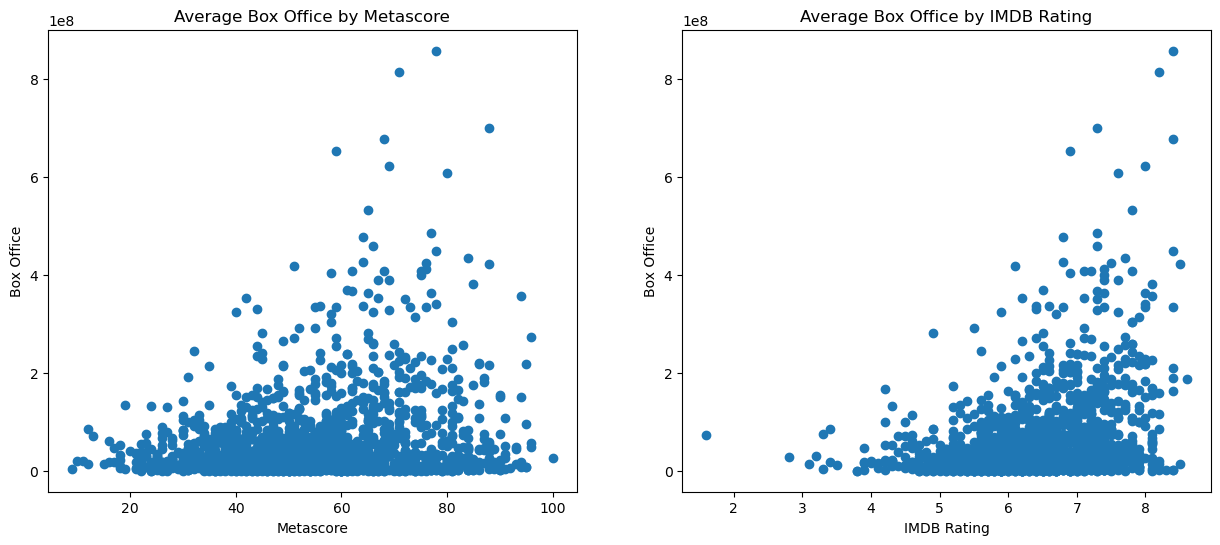

In [1035]:
plt.figure(figsize=(15, 6))

#subplots
plt.subplot(1, 2, 1)
plt.scatter(data['Metascore'], data['BoxOffice'])
plt.title('Average Box Office by Metascore')
plt.xlabel('Metascore')
plt.ylabel('Box Office')


plt.subplot(1, 2, 2)
plt.scatter(data['imdbRating'], data['BoxOffice'])
plt.title('Average Box Office by IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Box Office')


Although there is not a perfect correlation between these ratings and box office, we can point out some observations from these graphs. A movie with a large box office is generally on the higher side of the imdbRating scale. However, this does not seem to be the case with the metascore, where there are movies that have yielded a box office of more than $60,000,000 that have a mediocre metascore rating. All in all, we can take a look at all of these factors and try to come up with a way to determine whether a movie is a hit or not. 

### Model: Analysis, Hypothesis Testing, & ML  <a class="anchor" id="ml"></a>

In the data visualizations above, we analyze the different relationships that features such as month and rating have on Box Office. Now that we have visualized and discussed these trends, we proceed to analyze how the features listed above and more impact public perception through imdbRating via machine learning techniques. We utilize multiple ML classification algorithms, and compare their key statistics to see which one bets classifies our dataset.

Do you ever hear about the highest grossing box office movies, but wonder whether the audience genuinley enjoyed it? 
Or whether movie critics are actually reliable sources in determining public perception of movies? 
How about whether the month a movie releases has an impact on whether people like that movie or not? 


Using the features listed above and some others detailed below, we attempt to classify whether a movie is a hit or not. While there is no univeral definition for what classifies a hit film, we define it to be an imdbRating of over 6.5, which is significantly above average, with over 500 imdbVotes. This removes films that might have only a few ratings, which would skew the data. 


Because we are interested in applying a label as an output, we decided to use a classification model rather than a regression model, which is generally used for predicting a quantity. More information on the difference between these two types of models can be found [here](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/).


In [1036]:
#all necessary imports
import math

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

<b>Processing Data through One-Hot Encoding</b>

Before we explain one-hot encoding, it's important to recognize what [categorical data](https://en.wikipedia.org/wiki/Categorical_variable) is. In statistics, a categorical variable is a variable that can take on a number of possible values, each assigned to a specific group. In our project, a categorical variable could the genre (Comedy, Action, etc.) or rating(PG-13, R, etc.) of the movie. The issue with this kind of data is that many machine learning algorithms cannot operate on labeled data directly, as inputs and outputs must be numeric. This is where [one-hot encoding](https://en.wikipedia.org/wiki/Categorical_variable) is useful. It allows us to represent categorical variables as numerical values in a model. The categorical parameters will prepare separate columns for each individual label. For example, whenever there is a comedy movie, the value will be 1 in the new "Comedy" column and 0s for all the other columns. Here is a link to more information on one-hot encoding: [What is One Hot Encoding?](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)
 
 
For our data, there are problems beyond just categorical data that require processing. The genre labeling that is returned by the API lists some of the genres as a combination of multiple genres. There are many entries that look like "comedy, action." Movies with this genre must be listed in the "comedy" and "action" columns as 1s in the processed table. We do this by first extracting all the unique genres in the dataframe, making each a new column, and adding a 1 whenever a given movie has that genre in the list of genres or a 0 otherwise.

In [1037]:
#create a dictionary with unique genres
all_generes = set() 
for i in data["Genre"].unique():
    genre = i.split(",")
    for g in genre:
        b = g.replace(" ", "")
        all_generes.add(b)

#one-hot encoding
for genre in all_generes:
     data[genre] = data["Genre"].apply(lambda x: 1 if genre in x else 0)
    
all_ratings = set() 
for i in data["Rated"].unique():
    all_ratings.add(i)
    
#one-hot encode the ratings
for rat in all_ratings:
     data[rat] = data["Rated"].apply(lambda x: 1 if rat == x else 0)
        
all_ratings = list(all_ratings)
all_generes = list(all_generes)

#add columns
lst = all_ratings+ all_generes  +[ "Budget","BoxOffice", "month", "Metascore"]


data[lst].head(5)


,G,PG,TV-MA,Approved,Unrated,R,NC-17,PG-13,Not Rated,TV-14,...,Family,Biography,Western,Adventure,Sci-Fi,Mystery,Budget,BoxOffice,month,Metascore
944,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,165000000.0,188020017.0,11,74.0
928,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,3300000.0,13092000.0,10,89.0
2005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,45000000.0,422783777.0,7,88.0
1867,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,90000000.0,190241310.0,12,87.0
730,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,30000000.0,707481.0,11,77.0


#### Preliminary Exploration of Data for the Model  <a class="anchor" id="preliminary"></a>
We first begin with extrapolating the different features we will put into the model. From the data we explored above, we decided to explore this classification using Metascore, Budget, Box Office, month, genre, and rating (R, PG-13...) as features. While our dataframe contains other information such as actors, production company, and plot, we realize that it is simply impractical to include this information in our model as there are far too many actors and production companies that have been involved in the provided movies. We instead use this information for the movie recommender in the next section! 

First, we visualize which Ratings and which Genres have the most hits with the two pie charts below. We see that rated R movies have the highest percentage of hits, followed by PG-13. Additionally, we notice that Drama movies and Comedy movies have the highest percentage of hits, closely followed by Action and Adventure movies.

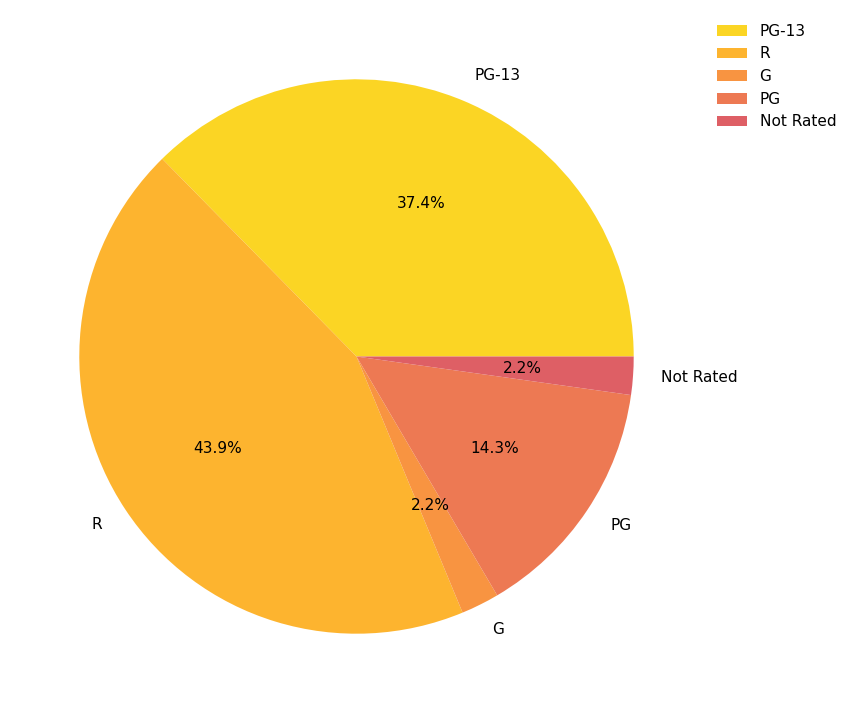

In [1038]:
h = {}
hits = len(data["hit"])
#get the unique ratings
ratings = data["Rated"].unique()
for i in ratings:
    x = len(data.loc[(data[i] == 1) & (data["hit"] == 1)])
    if x > 2:
        h[i] = x/hits
h
df = pd.DataFrame(h.items(), columns = ["Ratings", "Percent"])

pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(ratings)).as_hex())
#plot a pie chart for ratings by percentage
plt.figure(figsize=(9, 9))
plt.rcParams.update({'font.size': 11})
plt.pie(df.Percent,
        labels= df.Ratings,
        colors=pal_, autopct='%1.1f%%',
        pctdistance=.6)
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
plt.show()

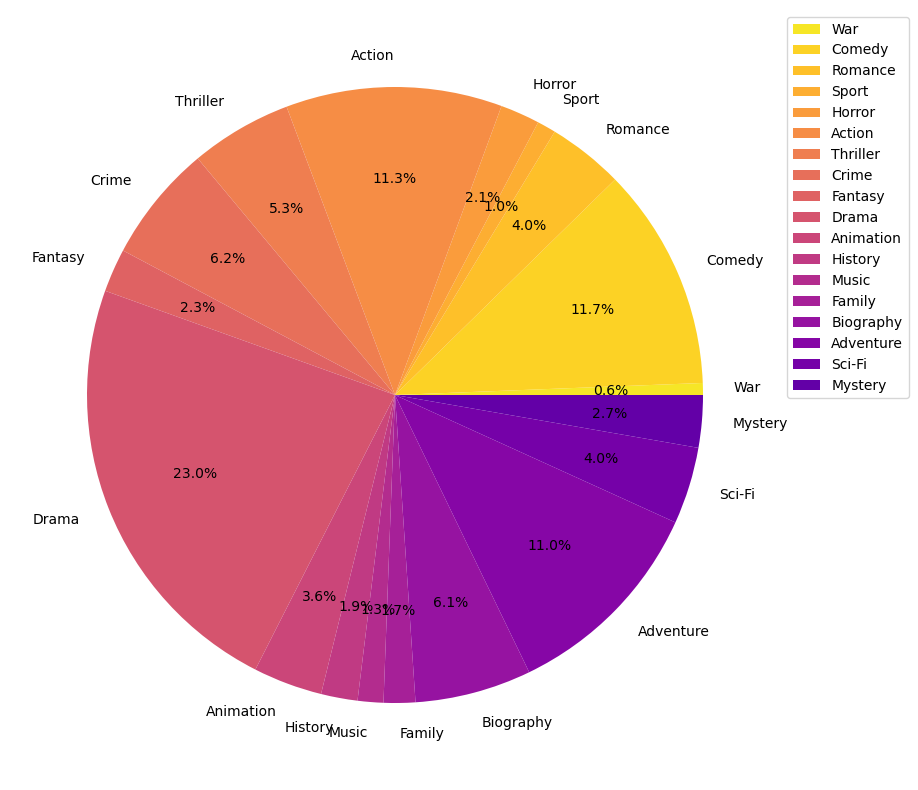

In [1039]:
h = {}
hits = len(data["hit"])
ratings = all_generes
for i in ratings:
    x = len(data.loc[(data[i] == 1) & (data["hit"] == 1)])
    if x > 10:
        h[i] = x/hits
h
df = pd.DataFrame(h.items(), columns = ["Genre", "Percent"])

pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(ratings)).as_hex())
#plot a pie chart for genre by percentage
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 10})
plt.pie(df.Percent,
        labels= df.Genre,
        colors=pal_, autopct='%1.1f%%',
        pctdistance=.7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=True)
plt.show()

#### Feature Importance  <a class="anchor" id="feature"></a>

We further analyze just how impactful each genre and each rating is by determining how important each feature is to having a hit movie. We do this by running a RandomForestClassifier, one of the most popular feature importance techniques. 

The algorithm involves constructing decision trees for each sample and generating output based off this tree. The final output is a majority vote on whether the trees resulted in a 1 or 0, in this case a hit or not. To learn more about RandomForestClassification and its use on finding feature importance, please refer to this resource [here](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=Random%20forest%20algorithm%20is%20an,both%20classification%20and%20regression%20problems.). 
The feature with the largest importance is Metascore, followed by Box Office, Budget, and month. 


The bar graphs below show the importance of each feature we use in our classification. Surprisingly, the movie pundits might be onto something, as the Metascore has the highest importance out of all the features we analyze. The second and third highest importance are the BoxOffice and Budget respectivly. This also aligns with what we expected, as when referencing popular movies, we tend to reference movies that are BoxOffice hits and have large production budgets. Additionally, as shown in the bar plot in the Visualization section, the month has a realtivley high feature importance on whether a movie is a hit or a flop. From there, we noticed that each genre and rating had a reduced feature importance in comparision to the aforementioned four features. This is because each genre and rating is considered its own feature, rather than collectivley determining the feature importance for genres and ratings. The importance of genres as a whole and ratings is shown in the second bar plot, which displays that genres actually have the second highest feature importance out of the given features. 

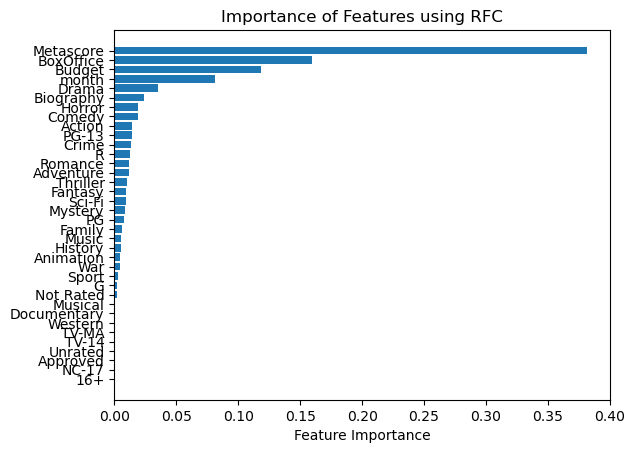

In [1040]:
tot = lst + ["hit"] 
#drop columns
data = data.dropna(subset=tot)

X = data[lst]
X.columns = X.columns.astype(str)

#use random forest classifier to view feature importance
y = data["hit"]
rf = RandomForestClassifier(n_estimators = 150) 
rf.fit(X, y) 
sort = rf.feature_importances_.argsort()
plt.barh(X.columns[sort], rf.feature_importances_[sort])
plt.title("Importance of Features using RFC")
plt.xlabel("Feature Importance")

#sort by most important
X.columns[sort]
rf.feature_importances_[sort]
all_features = {}
for i in range(len(X.columns[sort])):
    all_features[X.columns[sort][i]] = rf.feature_importances_[sort][i]


Text(0.5, 0, 'Feature Importance')

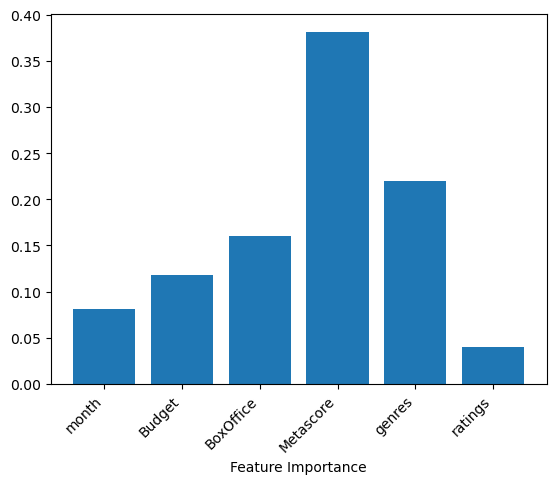

In [1041]:
all_features["genres"] = 0 
for key in all_features.keys():
    if key in all_generes:
        all_features["genres"] += float(all_features[key])

for i in all_generes:
    del all_features[i]
all_features

all_features["ratings"] = 0 
for key in all_features.keys():
    if key in all_ratings:
        all_features["ratings"] += float(all_features[key])

for i in all_ratings:
    del all_features[i]
all_features

#plot feature importance
plt.bar(range(len(all_features)), list(all_features.values()))
plt.xticks(range(len(all_features)), list(all_features.keys()))
plt.xticks(rotation = 45, ha = 'right')

plt.xlabel("Feature Importance")

Now that we confirmed that the features we hypothesized would have an impact on movie success, we run 3 different classification algorithms to determine whether we can correctly predict whether a movie would be a hit or not. We first split 80% of our data into a training set, and allocate the remaining 20 as the testing set. To determine which of the classification algorithms perform the best, we compare the [accuracy score](https://saifmorahman.medium.com/interpreting-accuracy-precision-recall-and-f1-score-metrics-46bba7f00b2c#:~:text=The%20accuracy%20metric%20is%20the,total%20number%20of%20data%20points.), which takes the total number of correctly predicted data points and divides it by the total number of data points. Another metric we use in determining the validity of the models is the [f1 score](https://saifmorahman.medium.com/interpreting-accuracy-precision-recall-and-f1-score-metrics-46bba7f00b2c#:~:text=The%20accuracy%20metric%20is%20the,total%20number%20of%20data%20points.), which takes the weighted average of precision and recall. It has more of a focus on false negatives and false positives. We additionally display the confusion matrix which displays the number of correct predictions, the number of Type 1 error predictions, and the number Type 2 error predictions. The formulas for both metrics and a description of the confusion matrix are detailed below. 
![accuracy](https://www.nomidl.com/wp-content/uploads/2022/02/image-13.png)
![f1score](https://miro.medium.com/v2/resize:fit:1400/1*5_ZAlFhlCk8llhnYWD5PXw.png)
![confusion matrix](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816)

In [1042]:
#Run for all data 
lst = all_ratings+ all_generes  +[ "Budget","BoxOffice", "month", "Metascore"]
X = data[lst] 
X.columns = X.columns.astype(str)
y = data["hit"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 0.20)

#### K Nearest Neighbors  <a class="anchor" id="knn"></a>

The first model we run is a K Nearest Neighbor Classifier (KNN). This classifier computes the euclidean distance between the test point and all the other data points and compares the K nearest neighbors to see whether to classify the test point as a 1 or 0. More information on the KNN model can be found [here](https://www.ibm.com/topics/knn#:~:text=Next%20steps-,K%2DNearest%20Neighbors%20Algorithm,of%20an%20individual%20data%20point.). After trial and error and reading reputable [sources](https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e) We take K to be the sqrt of the number of data points we have. 

Our accuracy score for the KNN model is ~ 70.80% which for a real-world data set is very good. According to the [data science community](https://stephenallwright.com/good-accuracy-score/#:~:text=There%20is%20a%20general%20rule,60%25%20and%2070%25%20%2D%20OK) an accuracy score of above ~70% is considered good. However, the f1 score, ~67.89%, is realtively low for the KNN model, and the confusion matrix shows clarity as to why. The model has a higher amount of false positives, perhaps because there are more non-hit movies than hit movies.

In [1043]:
#use the standard scalar and predict using KNN
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)
n = (int(math.sqrt(len(y_test)) - 1))
classifier = KNeighborsClassifier(n_neighbors = n, p = 2, metric = 'euclidean') 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", cm)

Accuracy Score:  0.7080536912751678
F1 Score:  0.6789667896678967
Confusion Matrix: 
 [[119  35]
 [ 52  92]]


C:\Users\saura\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The second model we run is a Support Vector Machine Classification (SVC). This classifier finds a hyper plane in an n-dimensional (where n is the number of features) plane that distincly classifies the data points. While there could be multiple hyperplanes, the SCV model chooses the hyperplane that maximizes the distance ebtween the data points of both classes. For more information on the SCV model, refer [here](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47). 

Our accuracy score for the SVC model is ~78.85% which is better much better than our KNN classifier. Additionally, the f1 score is also very high for the SCV model, which is even higher than the accuracy score. This means the model has a higher weighted average of precision and recall. As shown by the confusion matrix, the model only has ~39 False Negatives and ~24 False Positives. 

In [1044]:
#use svm model
svm_model = SVC() 
svm_model = svm_model.fit(X_train, y_train) 
y_pred = svm_model.predict(X_test) 
#print accuracy score based on test and prediction
accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred) 
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", cm)

Accuracy Score:  0.7885906040268457
F1 Score:  0.7920792079207922
Confusion Matrix: 
 [[115  39]
 [ 24 120]]


#### Random Forest Classifier  <a class="anchor" id="rfc"></a>

The third classification model we run is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. 

The accuracy score for the Random Forest Classifier is an ~81.67%, which is a higher accuracy score than the aforementioned two models. Because the accuracy score can be so varied for Random Forest, we average the accuracy and f1 scores over 15 different runs to find the mean scores. This is a better representation of the actual scores of the model, rather than simply running the model once, as Random Forest can have different scores for different runs due to the randomness of the model. 

In [1045]:
a = 0 
f1 = 0 
n = 15
for i in range(n):
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    #print out accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1 +  f1_score(y_test, y_pred)
    a = a + accuracy 
print("Accuracy: ", a/n)
print("F1 Score: ", f1/n)

Accuracy:  0.8102908277404921
F1 Score:  0.794568509556114


[//]: #omsairam 
[//]: #omsairam 
[//]: #omsairam 
#### Logistic Regression Classification  <a class="anchor" id="logistic"></a>

The fourth and final model we run is a Logistic Regression Classification. [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc), despite its name, is a classification model. In its simplest form, it models a binary output. Examples given by [Saishruthi Swaminathan of TowardsDataScience](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)  are, whether an email is spam (0) or not (1), or whether a tumor is malignant (0) or not (1). Logistic Regression is a transformation of linear regression that uses the [sigmoid function](https://www.sciencedirect.com/topics/computer-science/sigmoid-function)
, a function that lies strictly between 0 and 1. The output of Logistic Regression is the probability of each binary output.

Our accuracy score for the Logistic Regression Classification is ~56.71%, which is moderately high for our data. The f1 score is similar, at about 57.7%. This shows that the Logistic Regression Classification is the worst classifier out of all the ones we tested, as it has the lowest accuracy score and the lowest f1 score. Additionally, the confusion matrix shows that it misclassifed ~89 as False Positives and ~40 as False Negatives. 


In [1046]:
#create logistic regression model and fit on the data
lg_model = LogisticRegression() 
lg_model = lg_model.fit(X_train, y_train) 
y_pred = lg_model.predict(X_test) 
accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred) 
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", cm)


Accuracy Score:  0.5067114093959731
F1 Score:  0.5180327868852459
Confusion Matrix: 
 [[ 72 110]
 [ 37  79]]


Now that we've shown you how different classification algorithms work to predict a hit movie, lets switch gears to talk about building a movie recommendation system using [Natural Lanuguage Processing](https://aws.amazon.com/what-is/nlp/#:~:text=Natural%20language%20processing%20(NLP)%20is,manipulate%2C%20and%20comprehend%20human%20language.).

#### Movie Recommender  <a class="anchor" id="movieRec"></a>

In this section, we will construct a method to find out which movie the user should watch after they have inputed a movie that they like. Our dataset contains various movies with their corresponding details such as plot, actors, and directors. However, this information may not be the most useful to a user seeking recommendations. Therefore, in the first part of our movie recommender system, we aim to provide the user with a way to find movies similar to the one they already enjoy. This basic form of recommendation is similar to how popular streaming sites like Netflix, HBO, and Hulu recommend movies to their users. Our approach involves selecting a movie from our database and using cosine similarity to compare its plot and genre with other movies in the dataset to identify similar movies that the user may like.

In [1047]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [1048]:
#function that combines plot/genre
def combine_info(row):
    text = str(row["Plot"]) + " " + str(row["Genre"])
    text = text.translate(str.maketrans("", "", string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = " ".join(filtered_words)
    return filtered_text

#try out on Insideous
data2["combined"] = data2.apply(combine_info, axis = 1)
data2[data2['Title'] == 'Insidious']

,Unnamed: 0,index,Title,Genre,Actors,Director,Plot,Country,Language,imdbRating,...,imdbVotes,Metascore,month,day,year,Production Company,Rated,Budget,Keywords,combined
44,44,44,Insidious,"Horror, Mystery, Thriller","Patrick Wilson, Rose Byrne, Ty Simpkins",James Wan,A family looks to prevent evil spirits from tr...,"United States, Canada",English,6.8,...,"317,623",52.0,april,1.0,2011,FilmDistrict / Haunted Movies / Stage 6 Films ...,PG-13,1500000.0,"['medium', 'evil spirit', 'house warming', 'af...",family looks prevent evil spirits trapping com...


This code enhances our movie dataset by adding a new 'combined' column to 'data' that concatenates the 'Plot' and 'Genre' columns for each row. To improve the accuracy of our similarity score, we utilize the NLTK library to remove punctuation and stopwords from the combined text. Our aim is to identify movies that are similar to Insidious; thus, we start by selecting the row that corresponds to this movie.

In [1049]:
#tfid vectorizer to calculate scores
tfidf = TfidfVectorizer(max_features=2000)
feature = tfidf.fit_transform(data2["combined"])
movie_title = pd.Series(data2.index, index=data2["Title"])

This code uses TfidfVectorizer to calculate the TF-IDF scores for the 'combined' column (which contains the concatenated plot and genre for each movie) of the movie dataset 'data'. The resulting feature matrix is assigned to 'feature'. We then create a new series with just the indexes of the movies as well as the title for retrieving the similar titles later on.

In [1050]:
#cosine similary using Insideous
idx = movie_title["Insidious"]
vector = feature[idx]
reccomendations = cosine_similarity(vector, feature)
reccomendations = reccomendations.flatten()

This code generates movie recommendations by comparing the feature vector for Insidious to the feature vectors of all other movies in the dataset using cosine similarity. It then plots the resulting similarity scores.
Specifically, the code finds the index of the movie Insidious and retrieves its feature vector from the Tfidf-transformed data. It then calculates the cosine similarity between the movie and all other movies in the dataset, generating an array of similarity scores.

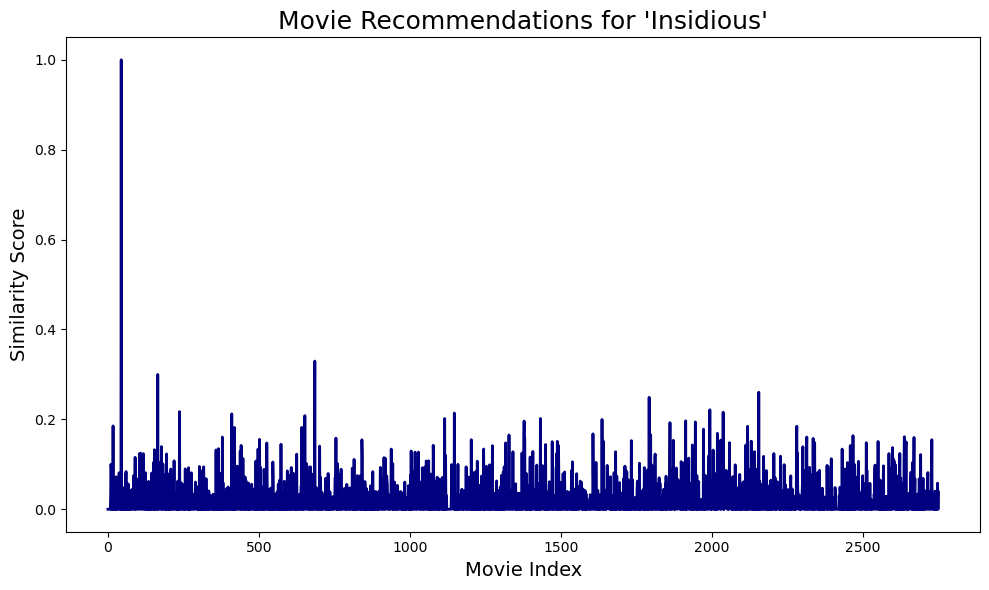

In [1051]:
#plot similarity graph
plt.figure(figsize=(10,6))
plt.plot(reccomendations, color='navy', linestyle='-', linewidth=2)
plt.title("Movie Recommendations for 'Insidious'", fontsize=18)
plt.xlabel("Movie Index", fontsize=14)
plt.ylabel("Similarity Score", fontsize=14)
plt.tight_layout()
plt.show()

The resulting plot of the similarity scores generated by the code shows that the movie with a similarity score of 1.0 is the input movie, Insidious. This indicates that the algorithm has successfully identified the movie as being identical to itself. If we look at the rest of the similarity scores on the plot, we can see that the next most similar movie to Insidious has a score of 0.3. This suggests that the algorithm has identified a movie with similar genre and plot elements to Insidious, although not as closely related as the movie itself.

In [1052]:
#list out the top 5 recs
(-reccomendations).argsort()
final_recs = (-reccomendations).argsort()[:5]
data2.iloc[final_recs]["Title"]

44                  Insidious
685      Insidious: Chapter 2
165     Paranormal Activity 3
2155       Brahms: The Boy II
1792      The Little Stranger
Name: Title, dtype: object

Finally, the code identifies the movies with the highest similarity scores by sorting the similarity score array. The top five movies with the most similar genre and plot elements to Insidious are then listed.

Overall, while cosine similarity is a useful metric to identify similarities between movies based on their plot and genre, it has its limitations. Movies may have similar plots and genres but differ in other aspects such as director, actors, release date, and language, among others. Incorporating these factors could lead to a more accurate similarity score and ultimately better recommendations.

#### Movie Recommender II  <a class="anchor" id="movieRec2"></a>

In this section of the movie recommendation system, our objective is to generate a description for a movie that is similar to its original summary using Natural Language Processing techniques. We will use Markov Models as the underlying principle to generate the summary. After generating the summary, we will compare its similarity with the summary scraped from Wikipedia for the same movie using cosine similarity to evaluate the effectiveness of our model.

Before delving into the coding aspect, it's crucial to comprehend the Markov Models, how it relates to the subject learned in class, and why we are utilizing it.

In class, we were introduced to the Naive Bayes model, which is a probabilistic model based on Bayes' theorem. This model calculates the probability of an event given some information, also known as conditional probability. Although Markov Models and Bayes' theorem are related, Markov Models are grounded on the underlying Markov assumption, which is based on the concept of modeling sequences where each state is only reliant on the preceding state.

The Markov model's formal notation is P(x at time t | x at time t - 1, x at time t-2, ...) = p(x at time t | x at time t-1). We plan to utilize Markov Models to predict the most probable word to appear next, given the previous one. If we represent each word as a state (s), P((s at time t) = y|(s at time t-1) = z) would be our objective.

Programmatically, we will store the probabilities in a 2-D matrix, where Xyz = P((s at time t) = y|(s at time t-1) = z). Since we are predicting the next word based on the current word, we need to define something for the initial word since it doesn't have a previous word to rely on.

Therefore, we define the initial state to be the number of times each sequence began with state x divided by the total number of sequences in our dataset. Our Xyz would then be the number of times we transitioned from state y to state z divided by the total number of times we were in state y.

For instance, let's consider the phrase "CMSC320 Rocks." We are interested in the probability of seeing the word "Rocks" following the word "CMSC320." Our Xyz would be the number of times we observe the sequence "CMSC320 Rocks" divided by the number of times we observe the sequence "CMSC320."

Generally, the more conditionals you add to Xyz = P((s at time t) = y|(s at time t-1) = z), the more accurate your predictions will be. Therefore, we plan to enhance our model by adding one more conditional or creating a "Second Order Markov Model" by adding one more, so Xyza = P(st = a| st-1 = z, st-2 = y).

In [1053]:
#imports for this section
import requests
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import string
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import r2_score
nltk.download('stopwords')

#request the plot of the avengers film
r = requests.get("https://en.wikipedia.org/wiki/The_Avengers_(2012_film)")
soup = BeautifulSoup(r.text, 'html.parser')
txt = [soup.find_all('p')[i].getText().replace("\''",'') for i in range(4,8)]
text = " ".join(txt)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First we have to to pick a movie and scrape the summary associated with it. We are going to pick The avengers movie as the movie whose summary we are going to compare. This code retrieves the Wikipedia page for the 2012 film "The Avengers" using the requests library. Then it uses the BeautifulSoup library to parse the HTML text of the page and extract the text of the 4th to 7th paragraphs of the article. The reason for using only the text between the 4th and 7th paragraphs is that the full summary on the Wikipedia page may be too long and contain irrelevant information for the movie recommendation system. By limiting the text to these specific paragraphs, we can focus on the most relevant and concise summary of the movie. The resulting text is then cleaned up and the paragraphs are then joined together into a single string variable called "text".

In [1054]:
initial = {} # stores initial state destribution
first_order = {} # first order transition probabilities but only for the second order
second_order = {} #stores second_order probabilities

In this section of code, we are initializing three dictionaries, namely, the initial state dictionary, first_order dictionary, and second_order dictionary. These dictionaries are used for generating text using the Markov Model. The first-order dictionary is used to compute the second-order dictionary. The dictionaries will later store the count of each token and the probability of transitioning from one token to another.

In [1055]:
for line in txt:
    line = line.strip().lower()
    words = line.translate(str.maketrans('', '', string.punctuation)).split()
    #This line removes all punctuation from a given string using Python's built-in translate() function and the string.punctuation module.
    for i in range(len(words)):
    # t would be the first word
        word1 = words[i]
        if i == 0:
        # first word so update initial state distribution
          initial[word1] = initial.get(word1, 0) + 1
        else:
        #not in initial state distribution
            x = words[i-1]
       #since it is not first state and second order we need to grab previous word
            if i == len(words) - 1:
                second_order.setdefault((x, word1), []).append('STOP')

                # measure probability of ending the line
                #if we are at the end of sentence we create a fake word to let us know when the line would end
                #still pass the last word, 
            if i == 1:
        # measure distribution of second word given only first word
        
        #looking at second word in statement so update the first_order which will be used for second_order
                first_order.setdefault(x, []).append(word1)

            else:
        #not looking at the first or second word so we have at least two words to look at
                word2 = words[i-2]
                second_order.setdefault((word2, x), []).append(word1)


This code processes a list of text lines by cleaning and tokenizing each line, and then uses the resulting tokens to update various dictionaries. The initial dictionary keeps track of the first word in each line, while the first_order dictionary tracks the probability of the second word given the first word. The second_order dictionary tracks the probability of the third word given the previous two words. Additionally, if the current token is the last one in the line, a special "END" token is added to the second_order dictionary to signify the end of the line. The dictionaries are updated using the dicionary's inbuilt setdefault function, which simply adds the given value to the list of values associated with the given key in the dictionary. Specifically the purpose of that [dictionary].setdefault line is to use a dictionary with a key and a corresponding value that is a list of possible next words. For example, if we have the phrases "I love school, I love cars, I love science", we can translate it into the dictionary {"I love": ["school", "cars", "science"]}. The goal is to later convert this into probabilities of each word appearing.

In [1056]:
#initial total has all the counts as of now so we normalize it
initial_total = sum(initial.values())
for key in initial:
    initial[key] /= initial_total

This code block performs normalization on the initial state distribution by dividing each count by the total count of all the initial words. The initial state distribution is a probability distribution of the first word of each line in the text corpus. By dividing each count by the total count, we convert the counts into probabilities that sum to 1, which represents the likelihood of each initial word occurring at the beginning of a line in the text corpus.

In [1057]:
def prob(words):
    prob = {}
    
    # Iteration
    for item in words:
        # increments key in dictionary by one
        prob[item] = prob.get(item, 0) + 1  
    # Normalizing the values
    prob = {item: count/len(words) for item, count in prob.items()}
    return prob

This code defines a function called "prob" that takes in a list as an argument. The function then creates an empty dictionary to hold the probabilities of each item in the list. It iterates over each item in the list, and if the item is not already in the dictionary, it adds it with a count of 1. If the item is already in the dictionary, it increments its count by 1. After counting all the items, the function then normalizes the counts to obtain the probabilities of each item, by dividing each count by the total length of the list. Finally, it returns the resulting probability dictionary.

In [1058]:
first_order = {x: prob(y) for x, y in first_order.items()}
second_order = {x: prob(y) for x, y in second_order.items()}


This section of code calculates the probabilities of the items in the original dictionaries and assigns the probabilities to the keys for both first_order and second_order dictionaries. 

In [1059]:
import random

#generate random word
def random_word(d):
    x = random.random()
    for t, p in d.items():
        if x < p:
            return t
        x -= p

The  function takes a dictionary of probabilities and returns a word based on a random sample. It iterates over the items in the dictionary, keeping a cumulative sum of their probabilities. If the random number is less than the cumulative sum, it returns the corresponding word. If the loop completes without finding a word, it raises a ValueError.

In [1060]:
#function for creating the summary
def create_summary():
    result = []
    for i in range(4): # generate 4 lines
        sentence = []

        # Initial state word
        first = random_word(initial)
        sentence.append(first)

        # first_order word
        second = random_word(first_order[first])
        sentence.append(second)

    # Continuing to do second_order words until the end
        while True:
            third = random_word(second_order[(first, second)])
            if third == 'STOP':
                break
            sentence.append(third)
            first = second
            second = third
        result.append(' '.join(sentence))
    return result

In this function, a list of 4 sentences is generated using a first-order Markov chain. The initial word of each sentence is always "The", and subsequent words are chosen probabilistically based on the previous word in the chain using the random_word function. The process continues until the word "FINAL" is generated, at which point the sentence is complete. The resulting sentences are returned as a list.

In [1061]:
#test cases
sample_text = create_summary()
sample_text = ' '.join(sample_text)


Let us see what we generated compared to what we scraped. 

In [1062]:
print("Generated Text: \n" + sample_text)
print("Original Text: \n"  +  text)


Generated Text: 
the asgardian loki encounters the other promises loki an army with which he can subjugate earth nick fury director of the espionage agency shield arrives at a remote research facility where physicist dr erik selvig is leading a team experimenting on the tesseract and uses his scepter to enslave selvig and other agents including clint barton to aid him in response fury reactivates the avengers initiative agent natasha romanoff heads to kolkata to recruit dr bruce banner to transform into the hulk rally in defense of new york city and together the avengers become divided over how to approach loki and the tesseract and a wormhole allowing loki to reach earth loki steals the tesseract through its gamma radiation emissions fury approaches steve rogers to retrieve the tesseract to develop powerful weapons as a team experimenting on the tesseract and uses his scepter to enslave selvig and other agents including clint barton to aid him the asgardian loki encounters the other t

There seems to be slight differences within the original and generated texts. To effectively compare both texts it is neccessary to get rid of stopwords. Let us plot the word counts of both texts to see why. 

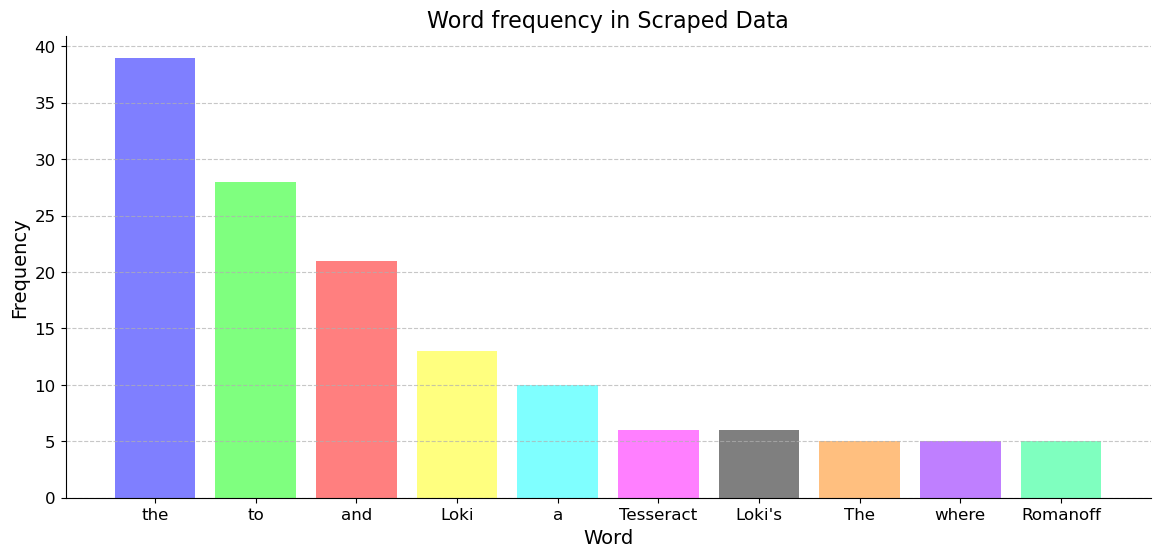

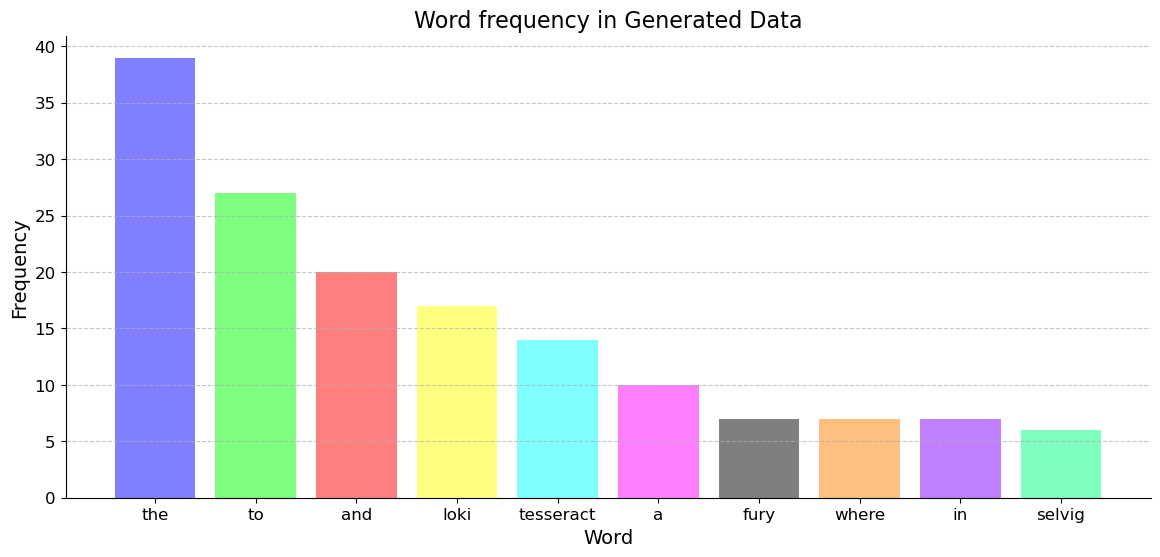

In [1063]:
from collections import defaultdict

#uses the sample_text and title to plot word frequency
def plot(sample_text, title):
    sentence_words = defaultdict(int)
    for words in sample_text.split(" "):
        sentence_words[words] += 1
    sentence_words = dict(sorted(sentence_words.items(), key=lambda x:x[1], reverse=True))
    sentence_words
    plt.figure(figsize=(14, 6))
    names = list(sentence_words.keys())
    values = list(sentence_words.values())
    colors = ['#7F7FFF', '#7FFF7F', '#FF7F7F', '#FFFF7F', '#7FFFFF', '#FF7FFF', '#7F7F7F', '#FFBF7F', '#BF7FFF', '#7FFFBF']
    plt.bar(range(10), values[:10], tick_label=names[:10], color=colors)
    plt.title(title, fontsize=16)
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
plot(" ".join(txt), "Word frequency in Scraped Data")
plot(sample_text, "Word frequency in Generated Data")


As seen when we display the words in the generated paragraph, "the", "to", "and", "a" are among the most common words in both summaries and thus might skew the similarity results.

In order for us to compare with our generated text with our original text let us further clean both these texts by getting rid of the stopwords

In [1064]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english"))

#cleans the data so that words such as "the" are not used
def cleaning2(two):
    final_descrip = []
    for descrip in two:
        descrip = descrip.translate (str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(descrip)
        sentence = [word for word in tokens if word.lower() not in stop_words]
        final = []
        for word in tokens:
            if word not in stop_words:
                final.append(word) 
        final_descrip.append(" ".join(final))
    return final_descrip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


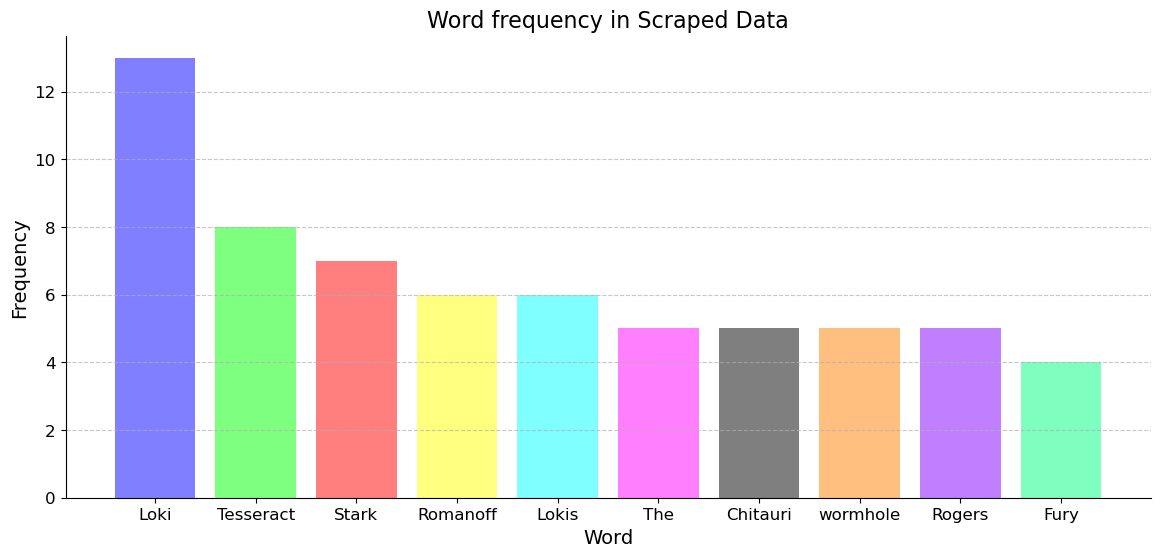

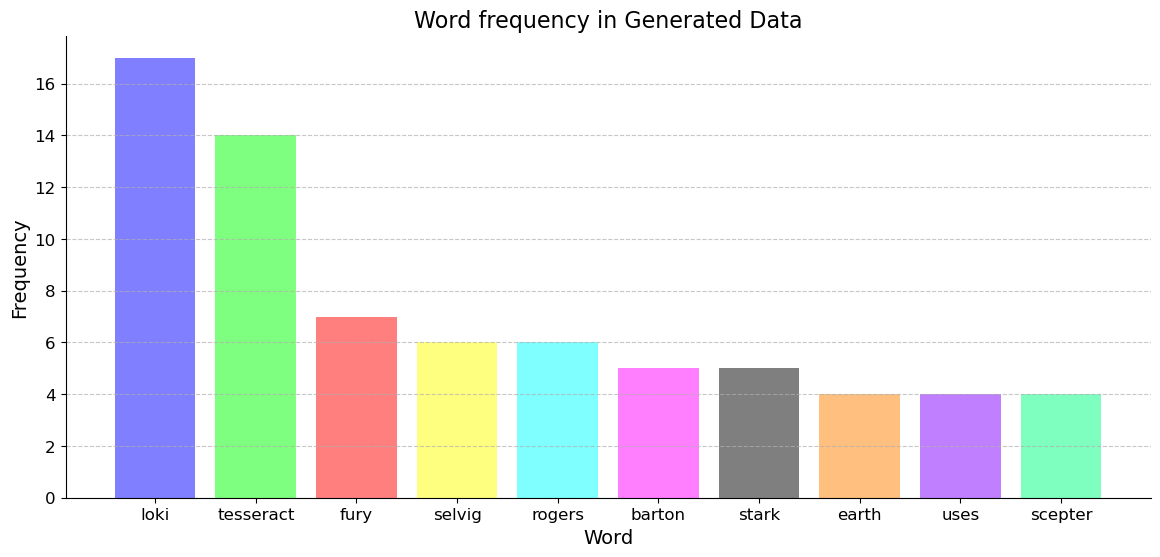

In [1065]:
orig_text = " ".join(cleaning2(txt))
generated_text = " ".join( cleaning2([sample_text]))
plot(orig_text, "Word frequency in Scraped Data")
plot(generated_text, "Word frequency in Generated Data")

Here we call out cleaning function on both the original text as well as the generated text to get rid of stopwords and punctation that might affect the cosine similarity process. Now the cosine similarity will be able to more accurately compare the similarity between both texts. 

In [1066]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform([orig_text, generated_text])
cosine_sim = (cosine_similarity(tfidf[0], tfidf[1])[0][0]).reshape(1,-1)
print(cosine_sim[0][0])

0.8078183532498256


A cosine similarity score of ~0.80 indicates a relatively high level of similarity between the summary of the movie obtained online and the summary generated using Markov models.However, it is to be noted that the generated text isn't the same every time it is ran. In fact, after running this multiple times the lowest similartiy I got for the same text was 0.53.

Thus, it can be said that there is a lot more that goes into text generated. Markov Models work by picking the sequence of words that result in the highest probability. Because of this, if one were to read the generated text, some sentences are not coherent and because of this some sentences dont make since. However, Markov Models serve as a great way to introduce the idea of text generation.

### Interpretation: Insight & Policy Decision  <a class="anchor" id="conclusion"></a>


Ultimately, we aimed to classify which movies were a "hit" based off their imdbRating, and were quite successful. In comparing the four different classifiers we used, RandomForestClassification had the highest accuracy score with above 81%. Additionally, the f1 score for the RandomForestClassification was the highest out of all the models, thus implying it had a high precision rate as well. In the future we hope to be able to add more features to our classifier, and fine tune our parameters to achieve a higher accuracy score. 

The recommender has identified movies with the highest similarity using cosine similarity. The movies with the most similar plot/genre are shown to the user. Something to think about is that movies may have similar plots and genres but differ in other aspects such as director, actors, release date, and language, among others. Incorporating these factors could lead to a more accurate similarity score and ultimately better recommendations.

As for the recommender part II, The cosine similarity score of around 0.80 indicates that there is a relatively high level of similarity between the movie summary obtained online and the summary generated using Markov models. However, it should be noted that the generated text is not the same every time it is run. In fact, when the same text was run multiple times, the lowest similarity score obtained was 0.53. This suggests that text generation involves a lot more than just using Markov models.

Markov models generate text by selecting the sequence of words that have the highest probability. As a result, some sentences in the generated text may not be coherent, and some may not make sense when read. Nevertheless, Markov models provide a useful way to introduce the concept of text generation.

Now, we've classified whether a movie will be well recieved or now and we offer you our very own (free of cost) movie recommender for you can keep watching movies similar to the ones you love and walk you through how you can build one of your own!